# CREDIT EDA Case Study


<b>Names: </b> Sharhedha Raghavan & Jallepalli Prerna

<b>Date: </b> 16/12/2019

<b>Time: </b> 23:00:00


<h3> Other related Instructions </h3>

-- All files are extracted from the same folder.
There is description of each step written after every code cell.

-- There are mainly <b> 2 Main DataFrames </b> for Application and Previous Application with the following name <b>applicatn_df and prev_applicatn_df</b> respectively.

-- For solving rest of the questions mentioned in the assignment, created the dataframes based on top of these 2 main dataframes.

<b>! Important: </b>

-- <b>As Ubuntu Operating System is used, please look over Path string that could be provided as file path is a 
bit different as compared to Windows OS </b>
See to it that both application and previous application files are in the same folder as that of the path provided.

### Importing the libraries

All the necessary libraries are imported, each library has a following commented line stating the using of the library in this assignment

In [1]:
import pandas as pd
# Pandas library helps in extracting the data from csv or excel files 
# into the dataframe and then further manipulating the data according to the necessary format

import numpy as np
# Numpy library helps in statistical calculation and also ploting the best fit line for each state in the assignment

import seaborn as sns
# Seaborn is another visualization library which can be used to plot various charts like, Bar Chart, Pie Chart etc.

import math
# Math library is used to do some basic mathematical operations like square roots etc.

import matplotlib.pyplot as plt
# Matplotlib is a visualization library which can be used to plot various charts like, Bar Chart, Pie Chart etc.

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline
# The above command is a magical command for ploting graphs in jupyter notebook

### To Install or Update Packages for running this assignment

!pip install palettable

!pip install -U seaborn

!pip install pandas-profiling

### Data Extraction for Part-1
2 Main Dataframes
Any further manipulation will be done using these 2 data frames

In [2]:
path = "/home/jallepalliprerna/Desktop/UPGRAD/Case Study/Credit EDA Case Study/"
applicatn_data = pd.read_csv(path + "application_data.csv")
# Extracting the data from the csv file

# print(len(applicatn_data))
print("Shape of the DataFrame as(rows, columns): " + str(applicatn_data.shape) + "\n")
# Shape of the Dataframe

print(applicatn_data.info())
print("\n")
# Basic information pertaining to the null values etc of the dataframe

print(applicatn_data.dtypes)
print("\n")
# Datatypes of each variable in the dataframe

print(applicatn_data.describe())
print("\n")
# Basic information regarding each column in the dataframe

Shape of the DataFrame as(rows, columns): (307511, 122)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMP

# Part-I: Analysis on Application Data

## Pandas Profiling
Helps in faster EDA

Having a quick overview of all the columns in the dataframe (All 122 columns)

for-example:
report = pandas_profiling.ProfileReport(applicatn_data)
- Pandas Profiling is the best way to do EDA, as it gives an overall picture of each variable and the variables which may not be necessary because of its high correlation with other columns etc.
A sample of profile report is attached, for 25 columns

## Data Cleaning for Part-1

<b> Removing the unnecessary columns as only 20-30 columns should be taken in this assignment </b>

We can further remove rows with maximum null values.

In [3]:
new_applicatn_df = applicatn_data[applicatn_data.columns[applicatn_data.isnull()
                                                         .sum()<((45*len(applicatn_data))/100)].tolist()]
# Removing all the columns which has more than 45% of missing values

# After removing columns having more than 45% of missing values we then remove few other unnecessary columns
new_applicatn_df = new_applicatn_df.drop(["OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "EXT_SOURCE_3", 
                             "DAYS_LAST_PHONE_CHANGE", "OCCUPATION_TYPE", "AMT_GOODS_PRICE"], axis = 1)

# There are yet other columns based on the above report that we can drop
new_applicatn_df = new_applicatn_df.drop(["FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", 
                              "FLAG_EMAIL", "REGION_RATING_CLIENT_W_CITY", "WEEKDAY_APPR_PROCESS_START", 
                              "HOUR_APPR_PROCESS_START", "REG_REGION_NOT_LIVE_REGION", 
                              "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", 
                              "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", 
                              "ORGANIZATION_TYPE", "EXT_SOURCE_2", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", 
                              "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", 
                              "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", 
                              "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", 
                              "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", 
                              "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21", "AMT_REQ_CREDIT_BUREAU_HOUR", 
                              "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "DAYS_BIRTH",
                              "AMT_REQ_CREDIT_BUREAU_QRT", "DAYS_ID_PUBLISH"], axis = 1)
# Eg. REGION_RATING_CLIENT_W_CITY ---> Highly correlated 
# OCCUPATION_TYPE ---> 31% missing values
# ORGANIZATION_TYPE --> not needed when we have Income Type which tells whether the client is working or not

### Identifying missing value data for treatment

At first listing out all the missing values which are treatable

##### Reported Missing values which can be treated without removing

In [4]:
print(round(100*(new_applicatn_df.isnull().sum()/len(new_applicatn_df.index)), 2))
# Listing out the number of missing values of each column

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT           0.00
DEF_30_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
dtype: float64


#### From the above we can report the following:

NAME_TYPE_SUITE              <b>(Categorical) </b> <br>
DEF_60_CNT_SOCIAL_CIRCLE     <b>(Numerical) </b> <br>
DEF_30_CNT_SOCIAL_CIRCLE     <b>(Numerical) </b> <br>
CNT_FAM_MEMBERS              <b>(Numerical) </b> <br>
AMT_ANNUITY                  <b>(Numerical) </b> <br>
AMT_REQ_CREDIT_BUREAU_MON    <b>(Numerical) </b> <br>
AMT_REQ_CREDIT_BUREAU_YEAR   <b>(Numerical) </b> <br>

##### Treating the reported missing values

In [5]:
# Categorical Missing values Treatment
value = new_applicatn_df["NAME_TYPE_SUITE"].mode()[0]
new_applicatn_df.loc[pd.isnull(new_applicatn_df['NAME_TYPE_SUITE']), ['NAME_TYPE_SUITE']] = value
# Since the column is a categorical variable we an replace the null values with the maximum frequency category

#Numerical Missing Value Treatment
value = new_applicatn_df["DEF_60_CNT_SOCIAL_CIRCLE"].mean()
new_applicatn_df.loc[pd.isnull(new_applicatn_df['DEF_60_CNT_SOCIAL_CIRCLE']), ['DEF_60_CNT_SOCIAL_CIRCLE']] = value
# Replacing with mean is 

value = new_applicatn_df["DEF_30_CNT_SOCIAL_CIRCLE"].mean()
new_applicatn_df.loc[pd.isnull(new_applicatn_df['DEF_30_CNT_SOCIAL_CIRCLE']), ['DEF_30_CNT_SOCIAL_CIRCLE']] = value

value = new_applicatn_df["CNT_FAM_MEMBERS"].median()
new_applicatn_df.loc[pd.isnull(new_applicatn_df['CNT_FAM_MEMBERS']), ['CNT_FAM_MEMBERS']] = value
# Median is used for this column as the number of family members cannot be in decimal values and 
# we can get a fair idea

value = new_applicatn_df["AMT_ANNUITY"].median()
new_applicatn_df.loc[pd.isnull(new_applicatn_df['AMT_ANNUITY']), ['AMT_ANNUITY']] = value

value = new_applicatn_df["AMT_REQ_CREDIT_BUREAU_MON"].median()
new_applicatn_df.loc[pd.isnull(new_applicatn_df['AMT_REQ_CREDIT_BUREAU_MON']), ['AMT_REQ_CREDIT_BUREAU_MON']] = value

value = new_applicatn_df["AMT_REQ_CREDIT_BUREAU_YEAR"].median()
new_applicatn_df.loc[pd.isnull(new_applicatn_df['AMT_REQ_CREDIT_BUREAU_YEAR']), ['AMT_REQ_CREDIT_BUREAU_YEAR']] = value   


# Dealing with minor missing values like gender, cannot be NA either Male or Female hence removing rows 
# containing NA or null values

new_applicatn_df = new_applicatn_df[new_applicatn_df["CODE_GENDER"]!= 'XNA']
# The above can be removed as it is not as meaningful data that is gender cannot be XNA and 
# the rows corresponding to that can be removed

new_applicatn_df = new_applicatn_df[new_applicatn_df["NAME_FAMILY_STATUS"]!= 'Unknown']
# The above can be removed as it is not as meaningful data that is gender cannot be Unkonwn and 
# the rows corresponding to that can be removed as there are only 2 such rows

### Converting Datatypes of the column

Identify the columns with datatype <b> Object </b> datatype and give them a meaningful datatype values

In [6]:
new_applicatn_df["NAME_CONTRACT_TYPE"] = new_applicatn_df["NAME_CONTRACT_TYPE"].astype('category')
# It is a categorical variable with 2 unique values ('Cash loans', 'Revolving loans')

new_applicatn_df["CODE_GENDER"] = new_applicatn_df["CODE_GENDER"].astype('category')
# It is a categorical variable with 2 unique values ('M', 'F')

new_applicatn_df["NAME_TYPE_SUITE"] = new_applicatn_df["NAME_TYPE_SUITE"].astype('category')
# It is a categorical variable with 2 unique values ('Unaccompanied', 'Family', 'Spouse, partner', 'Children',
#        'Other_A', 'Other_B', 'Group of people')

new_applicatn_df["NAME_FAMILY_STATUS"] = new_applicatn_df["NAME_FAMILY_STATUS"].astype('category')
# It is a categorical variable with 2 unique values ('Single / not married', 'Married', 'Civil marriage', 'Widow',
#        'Separated')

new_applicatn_df["FLAG_OWN_CAR"] = new_applicatn_df["FLAG_OWN_CAR"].astype('category')
# It is a categorical variable with 2 unique values ('N', 'Y')

new_applicatn_df["FLAG_OWN_REALTY"] = new_applicatn_df["FLAG_OWN_REALTY"].astype('category')
# It is a categorical variable with 2 unique values ('Y', 'N')

new_applicatn_df["NAME_INCOME_TYPE"] = new_applicatn_df["NAME_INCOME_TYPE"].astype('category')
# It is a categorical variable with 2 unique values ('Working', 'State servant', 'Commercial associate', 'Pensioner',
#        'Unemployed', 'Student', 'Businessman', 'Maternity leave')

new_applicatn_df["NAME_EDUCATION_TYPE"] = new_applicatn_df["NAME_EDUCATION_TYPE"].astype('category')
# It is a categorical variable with 2 unique values ('Secondary / secondary special', 'Higher education',
#        'Incomplete higher', 'Lower secondary', 'Academic degree')

new_applicatn_df["NAME_HOUSING_TYPE"] = new_applicatn_df["NAME_HOUSING_TYPE"].astype('category')
# It is a categorical variable with 2 unique values ('House / apartment', 'Rented apartment', 'With parents',
#        'Municipal apartment', 'Office apartment', 'Co-op apartment')

new_applicatn_df.dtypes
# Printing out all the datatypes of the variables after converting into a meaningful form

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE            category
CODE_GENDER                   category
FLAG_OWN_CAR                  category
FLAG_OWN_REALTY               category
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
NAME_TYPE_SUITE               category
NAME_INCOME_TYPE              category
NAME_EDUCATION_TYPE           category
NAME_FAMILY_STATUS            category
NAME_HOUSING_TYPE             category
REGION_POPULATION_RELATIVE     float64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
DEF_30_CNT_SOCIAL_CIRCLE       float64
DEF_60_CNT_SOCIAL_CIRCLE       float64
AMT_REQ_CREDIT_BUREAU_MON      float64
AMT_REQ_CREDIT_BUREAU_YEAR     float64
dtype: object

## Correlation Plot for Part-1

##### For all Numerical Columns, plotting the heat map to look at the the correlations

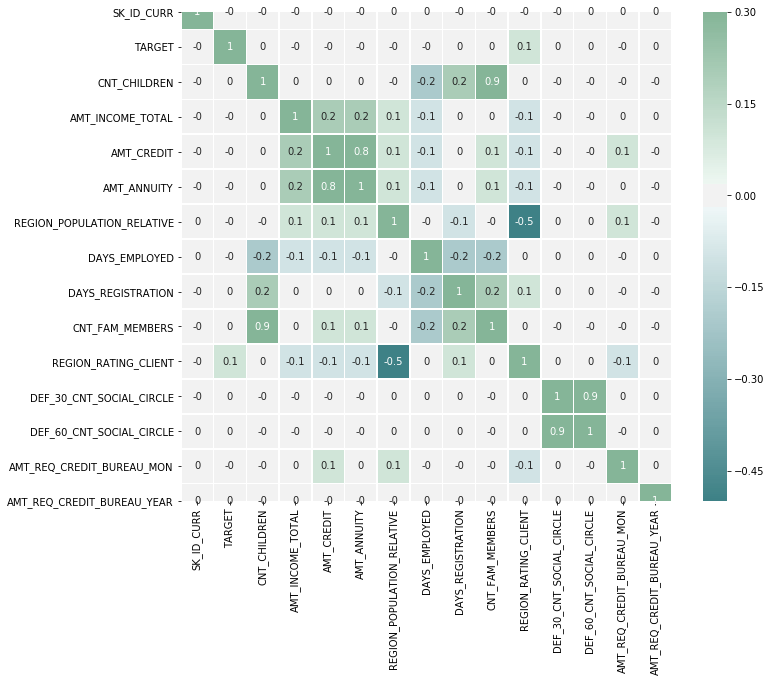

In [7]:
# Creating a heat map for the numerical columns
corr = round(new_applicatn_df.corr(),1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 500, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, linewidths=.5, annot=True)

<b> Reason for choosing this graph: </b>
HeatMap is best used for finding the coorelations between any two numerical variables in the dataset

<b> Analysis: </b> We find that there is hardly any much correlation in the data. Although there one such correlation has 0.9 but then CNT_CHILDREN would be a subset of CNT_FAM_MEMBERS. Otherwise most of the numericals have about 0.5 - 0.2

## Outlier Detection and Treatment

Identifying all the variables which have outliers in the dataset and then treating them with suitable methods


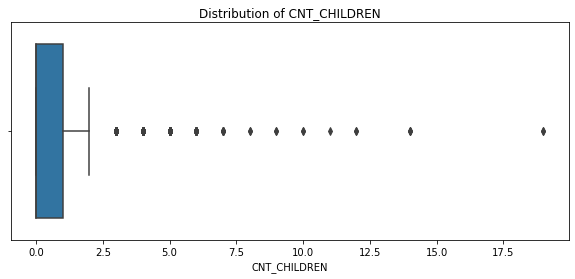

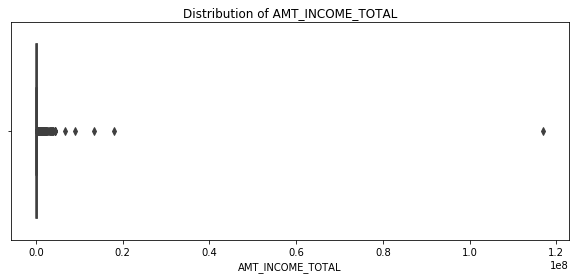

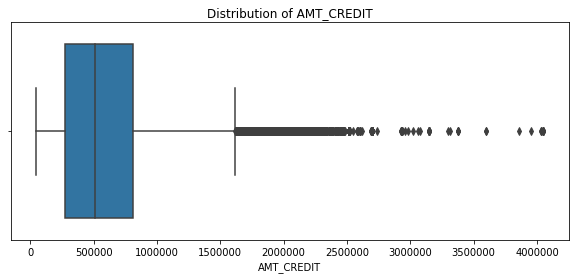

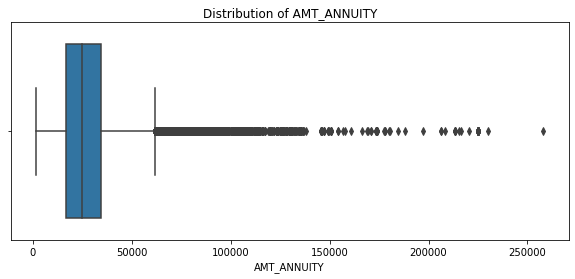

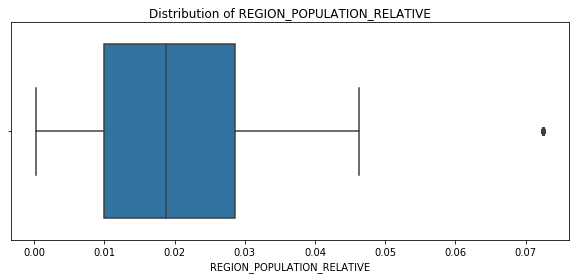

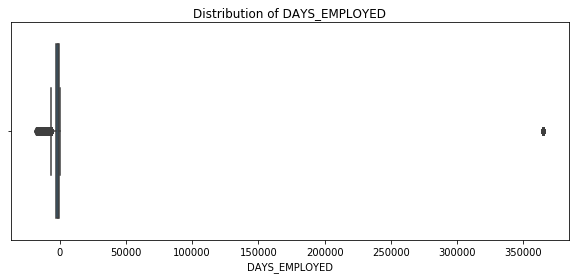

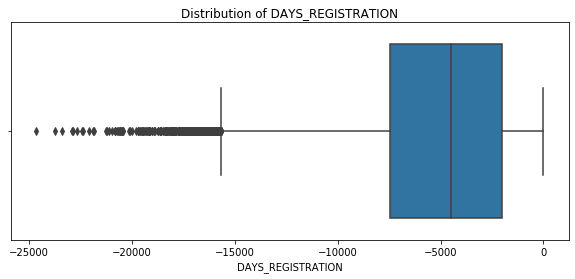

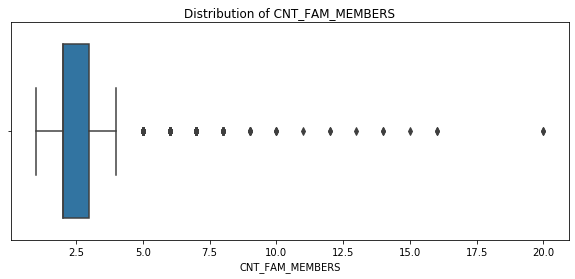

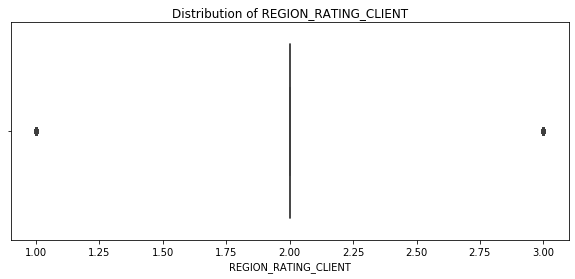

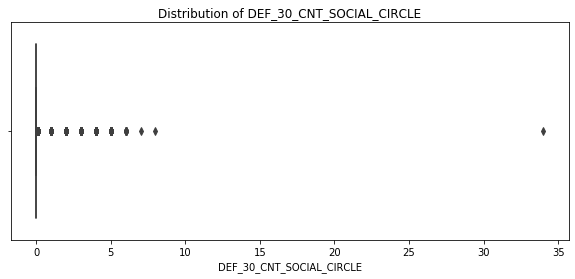

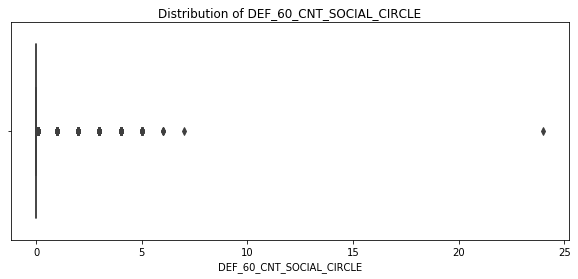

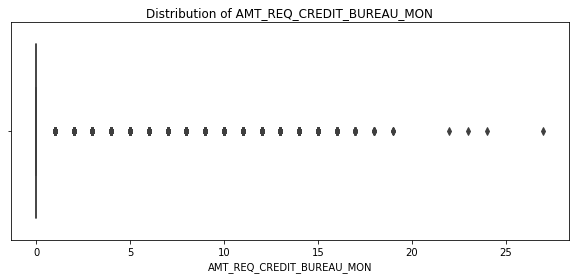

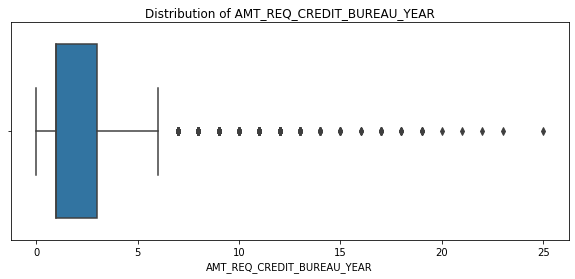

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
list_columns = list(new_applicatn_df.select_dtypes(include=numerics).columns)
# Taking out all the numerical columns from the dataset

list_columns.remove("SK_ID_CURR")
list_columns.remove("TARGET")
# Removng some columns

for item in list_columns:
    plt.figure(figsize=(10,4))
    plt.title("Distribution of " + str(item))
    ax = sns.boxplot(new_applicatn_df[item])
# Plotting the box plot for each numerical column that has been taken out

<b> Reason for choosing this graph: </b>
BoxPlot is best used for outlier detection we can look at the outliers.

<b> Analysis: </b> We can see that there are a lot of outliers in these columns, Following are the Outliers detected.

- CNT_CHILDREN
- AMT_INCOME_TOTAL  (Highly skewed)
- AMT_CREDIT (Highly skewed)
- AMT_ANNUITY

Although there are more than 4 variables which have outlier data, but we will be removing the outliers from only 4 columns



To deal with this there are two methods:

- Remove the ouliers and take the data from first quantile to third quantile

- Perform a log transformation on the data columns

We choose to perform log transformation on few columns and and for others we choose to remove the outliers based on Quantile range

In [9]:
# Printing out the sum of unique values in each variable identified above
new_applicatn_df["CNT_CHILDREN"].value_counts()

y = new_applicatn_df['CNT_CHILDREN']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
new_applicatn_df = new_applicatn_df[removed_outliers]

# for other 3 columns we can perform log transformation over the columns
new_applicatn_df["AMT_INCOME_TOTAL"] = [math.log(x) for x in new_applicatn_df["AMT_INCOME_TOTAL"]]
new_applicatn_df["AMT_CREDIT"] = [math.log(x) for x in new_applicatn_df["AMT_CREDIT"]]
new_applicatn_df["AMT_ANNUITY"] = [math.log(x) for x in new_applicatn_df["AMT_ANNUITY"]]

### Analysis of the data before dividing into 2 dataframes

#### Imbalance Ratio


Round off Imbalance Ratio: 92:8


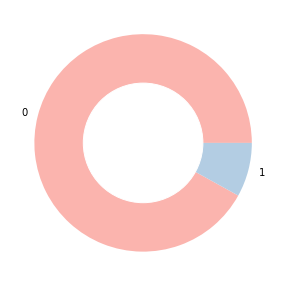

In [10]:
x = new_applicatn_df["TARGET"].value_counts()[0]
y = new_applicatn_df["TARGET"].value_counts()[1]
imbalance_ratio = str(int(round(x/(x+y)*100))) + ":" + str(int(round(y/(x+y)*100)))
print("Round off Imbalance Ratio: " + imbalance_ratio)

# PLotting the graph for looking at the 
names = new_applicatn_df['TARGET'].astype('category').cat.categories.tolist()
counts = new_applicatn_df['TARGET'].value_counts()

size=[counts[var_cat] for var_cat in names]
plt.figure(figsize=(10,5))
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.55, color='white')

from palettable.colorbrewer.qualitative import Pastel1_7
plt.pie(size, labels=names, labeldistance=1.1, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
#### Add the legend for the plot

<b> Reason for choosing this graph: </b>
PieChart (DONUT-chart) is best used for Univariate Analysis, and comapring the values within the variable

<b> Analysis: </b> We observe that there is a lot of imbalnce in the data, as around 92% of the data is having Target value as 0 which implies that the clients who have paid back the loan amount is much higer than the clients who have defaulted.

## Dividing the Dataset into 2 Dataframe

In [11]:
# Dividing the dataset into 2 parts Target-1 and Target-2
df = new_applicatn_df.drop(["SK_ID_CURR"], axis=1)
tar_1_df = df[df["TARGET"]==1]
tar_0_df = df[df["TARGET"]==0]

In [12]:
tar_1_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,12.218495,12.915579,10.114579,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-637,-3648.0,1.0,2,2.0,2.0,0.0,1.0
26,1,Cash loans,F,N,Y,0,11.630709,13.795300,10.206421,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-2628,-6573.0,1.0,3,1.0,0.0,0.0,2.0
40,1,Cash loans,M,N,Y,0,12.218495,13.992468,10.463903,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-1262,-1182.0,2.0,2,0.0,0.0,2.0,4.0
42,1,Cash loans,F,N,N,0,11.813030,12.573742,9.696371,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-3597,-45.0,2.0,3,0.0,0.0,0.0,2.0
81,1,Cash loans,F,N,Y,0,11.302204,12.437184,9.588332,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,365243,-5391.0,2.0,2,1.0,1.0,0.0,0.0


In [13]:
tar_0_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
1,0,Cash loans,F,N,N,0,12.506177,14.072864,10.482864,Family,State servant,Higher education,Married,House / apartment,0.003541,-1188,-1186.0,2.0,1,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,11.119883,11.813030,8.817298,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-225,-4260.0,1.0,2,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,11.813030,12.652944,10.298448,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-3039,-9833.0,2.0,2,0.0,0.0,0.0,1.0
4,0,Cash loans,M,N,Y,0,11.707670,13.148031,9.992665,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3038,-4311.0,1.0,2,0.0,0.0,0.0,0.0
5,0,Cash loans,M,N,Y,0,11.502875,13.103171,10.222577,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-1588,-4970.0,2.0,2,0.0,0.0,0.0,1.0


### Univariate Analysis: Categorical variables

Plotting the bar plot for all the categorical variables and analysing them

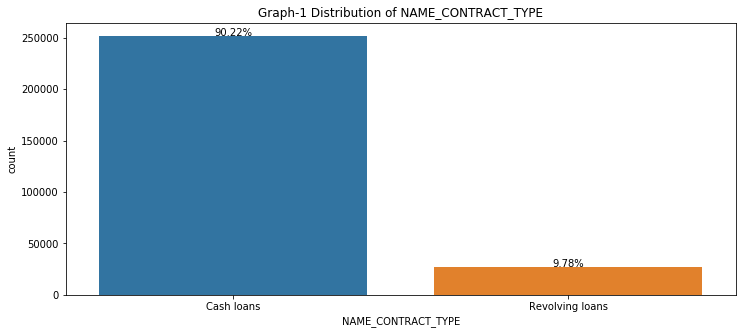

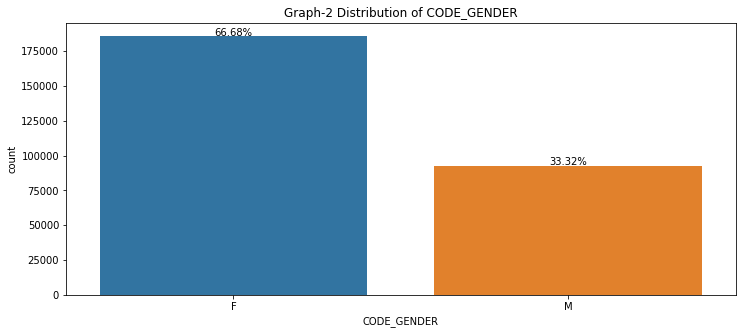

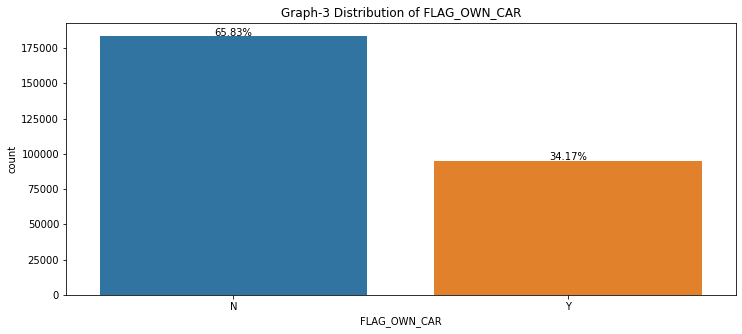

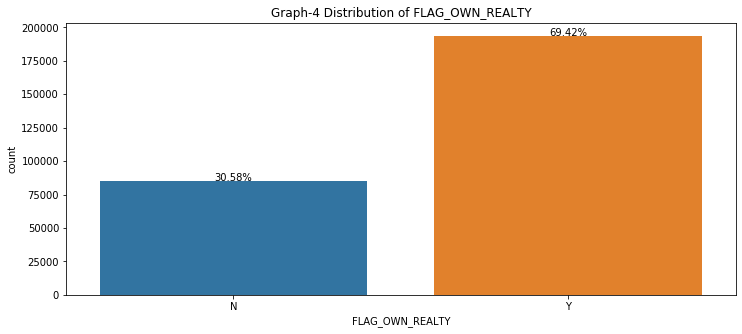

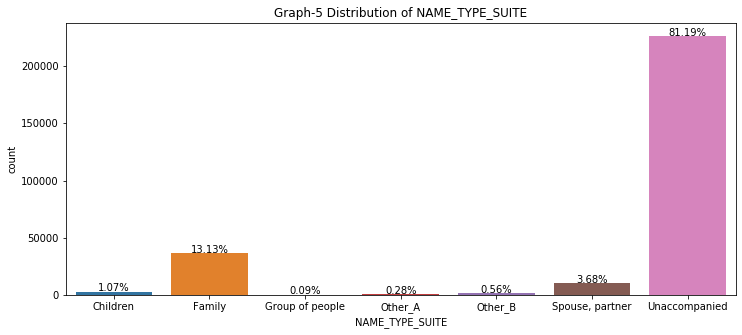

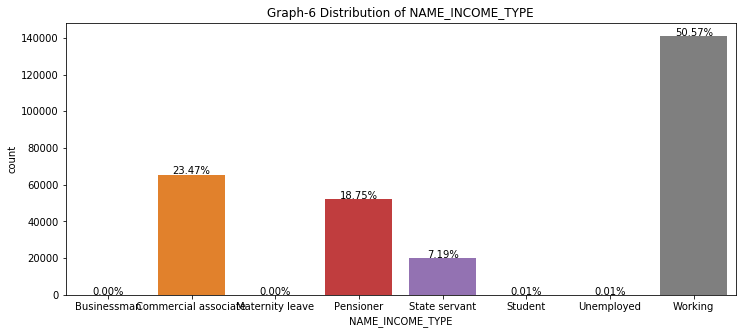

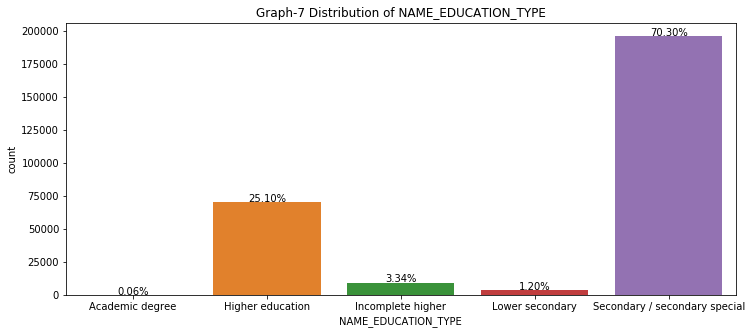

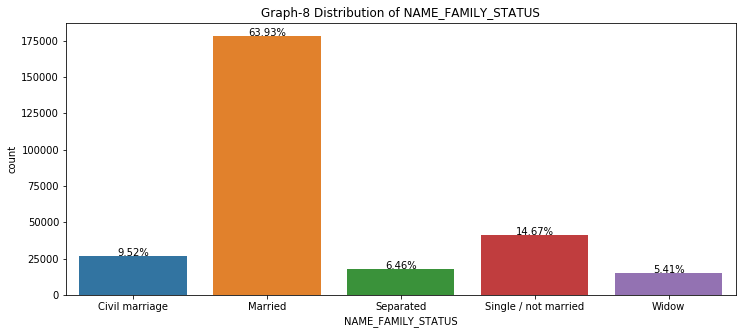

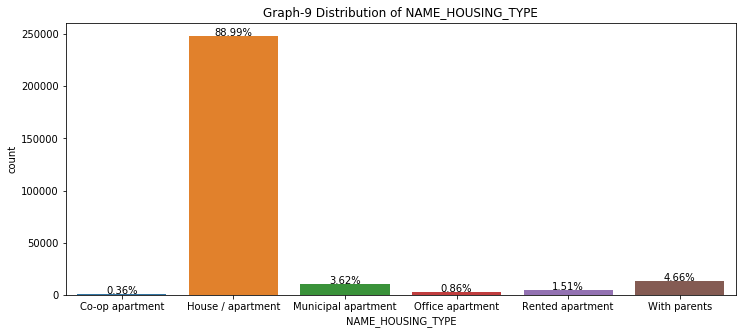

In [14]:
numerics = ['category']
i = 1
list_columns = list(tar_0_df.select_dtypes(include=numerics).columns)
for item in list_columns:
    plt.figure(figsize=(12,5))
    plt.title("Graph-{0} Distribution of ".format(str(i)) + str(item))
    ax = sns.countplot(x=item, data=tar_0_df)
    i = i+1
    
    total = len(tar_0_df[item])
    for p in ax.patches:
        height = p.get_height()
        value = float(height/total)*100
        ax.text(p.get_x()+p.get_width()/2., height + 200, '{:1.2f}%'.format(value), ha="center")  
    
# Add legend, xlabel, ylabel for each plot

<b> Reason for choosing this graph: </b>
Bar Charts are best used for Univariate Analysis

<b> Analysis for all the above graphs: </b>
<br> <br>
<b>GRAPH-1:</b>  The people who have paid without any difficulties are around 90% of the times have taken Cash loans

<b>GRAPH-2:</b>  Females who paid without any difficulties are oberserved to be higher than the Male defaulters

<b>GRAPH-3:</b>  People who have not even owned any car have paid without any difficulties are around 66% (approx.)

<b>GRAPH-4:</b>  People who owns some property like house etc. are observed to have paid without any difficulties are about 69% of the times, this may be due to their previous loans pending.

<b>GRAPH-5:</b>  People who have applied the loan on their own without anyone accompanying them have paid without any               difficulties are  the most around 81%

<b>GRAPH-6:</b>  It is observed that Working people have paid without any difficulties are around 50% of the times

<b>GRAPH-8:</b>  Married people have paid without any difficulties are around 64% as compared to any other family status             related

<b>GRAPH-9:</b>  People owning a house/apartment have paid without any difficulties are the most which can be compared to           GRAPH-4 Analysis.

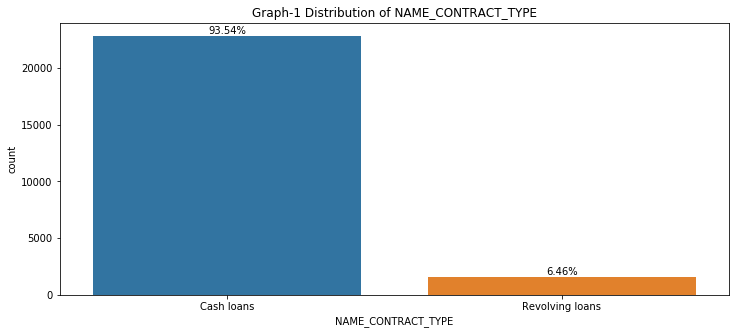

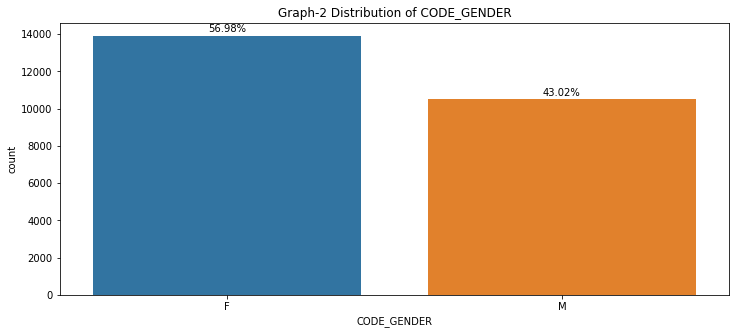

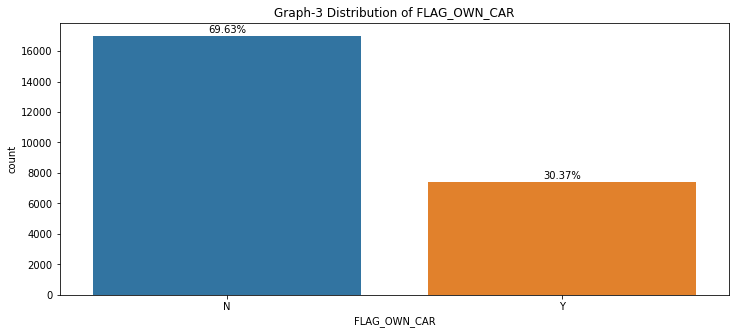

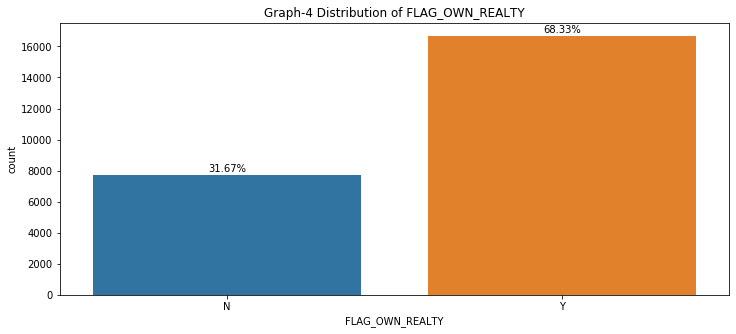

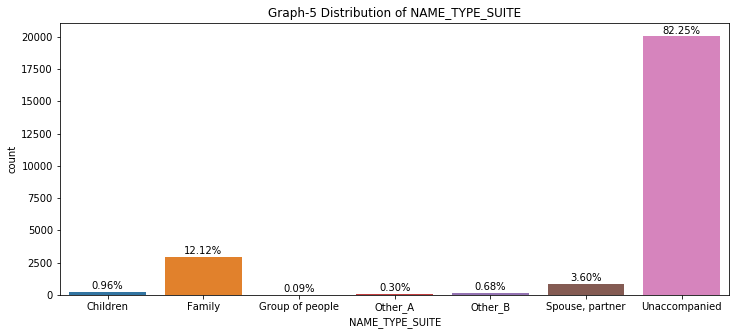

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


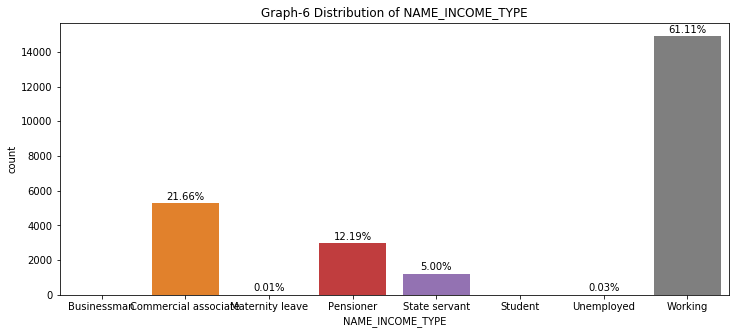

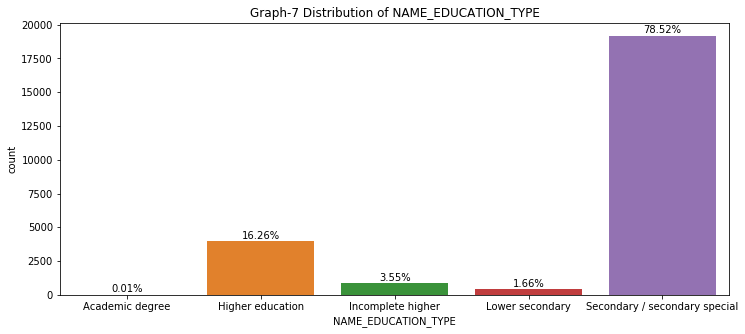

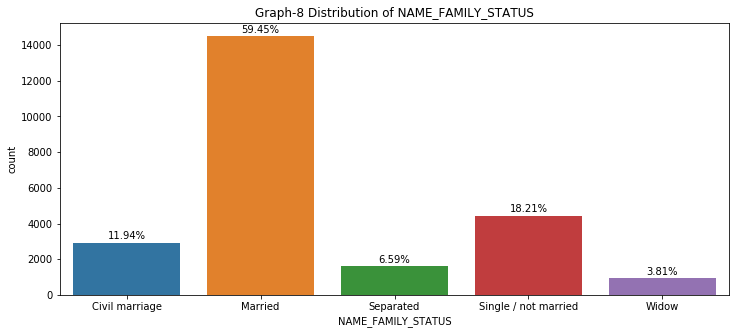

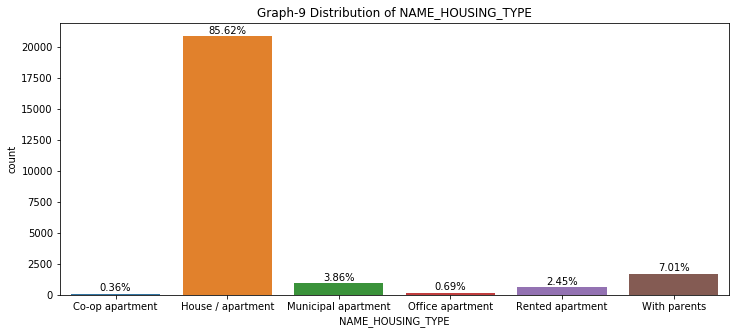

In [15]:
numerics = ['category']
list_columns = list(tar_1_df.select_dtypes(include=numerics).columns)
i = 1
for item in list_columns:
    plt.figure(figsize=(12,5))
    plt.title("Graph-{0} Distribution of ".format(str(i)) + str(item))
    ax = sns.countplot(x=item, data=tar_1_df)
    i = i+1
    
    total = len(tar_1_df[item])
    for p in ax.patches:
        height = p.get_height()
        value = float(height/total)*100
        ax.text(p.get_x()+p.get_width()/2., height + 200, '{:1.2f}%'.format(value), ha="center")  
    
# Add legend, xlabel, ylabel for each plot

<b> Reason for choosing this graph: </b>
Bar Charts are best used for Univariate Analysis

<b> Analysis for all the above graphs: </b>
<br> <br>
<b>GRAPH-1:</b>  The people who have defaulted around 93.54% of the times have taken Cash loans

<b>GRAPH-2:</b>  Female defaulters are oberserved to be slightly higher than the Male defaulters

<b>GRAPH-3:</b>  People who are have not even owned any car have defaulted around 70% (approx.)

<b>GRAPH-4:</b>  People who owns any property like house etc. are observed to be defaulting about 68% of the times, this             may be due to their previous loans pending.

<b>GRAPH-5:</b>  People who have applied the loa on their own without anyone accompanying them have defaulted the most               around 82%

<b>GRAPH-6:</b>  Stangely it is observed that Working people have defaulted around 61% of the times

<b>GRAPH-8:</b>  Married people have defaulted around 59% as compared to any other family status related

<b>GRAPH-9:</b>  People owning a house/apartment have defaulted the most which can be compared to GRAPH-4 Analysis.



### Comaparing both Target 1 and Target 0 graphs

- All the variables performed alomost similarly in both the scenarios

- It becomes difficult for to exactly say based on this as to who could have defaulted

<b> One of the Reasons why they are giving the same results is because of the Imabalance in the Target Variable</b>


### Univariate Analysis: Numerical Variables

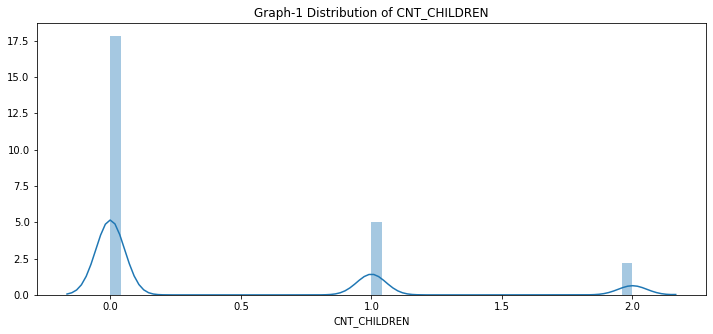

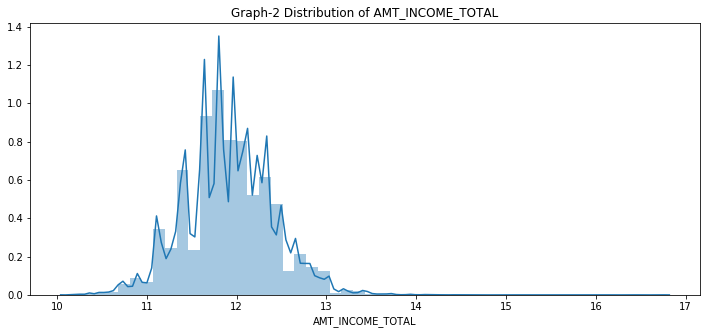

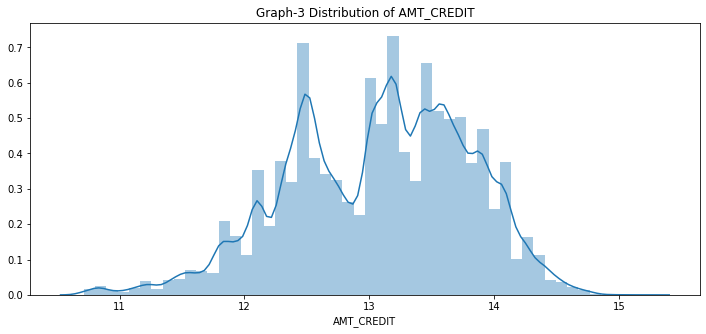

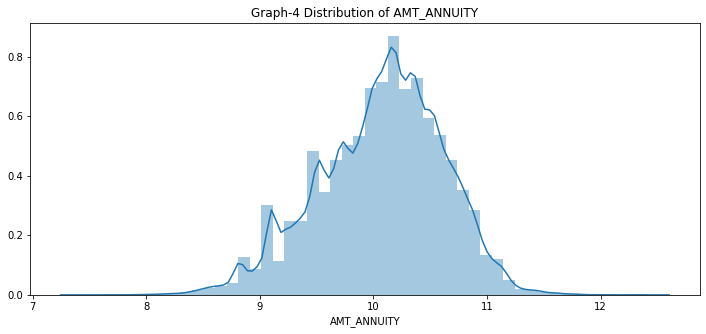

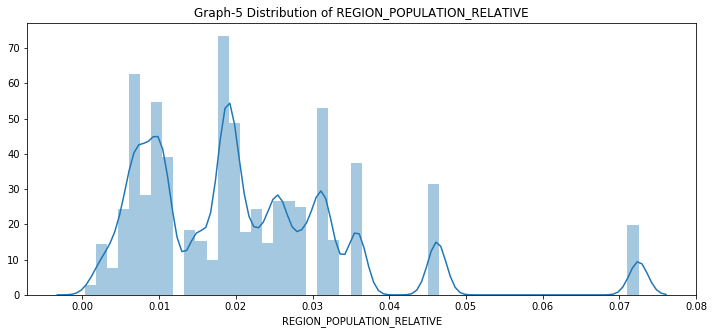

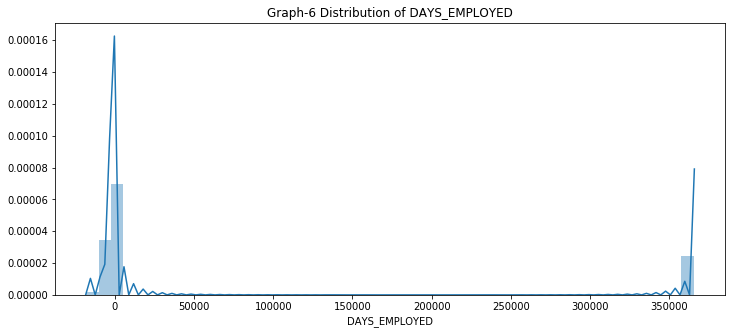

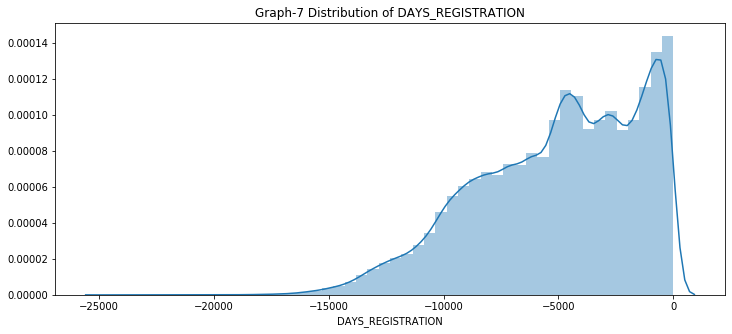

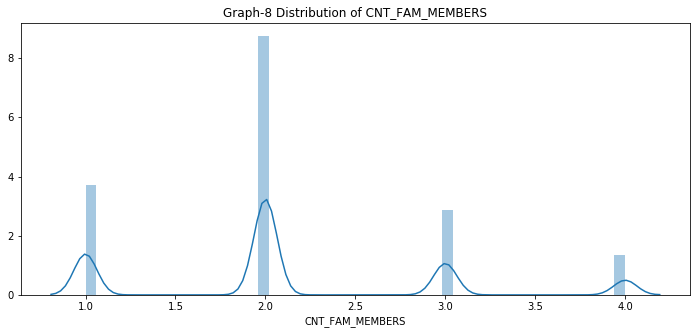

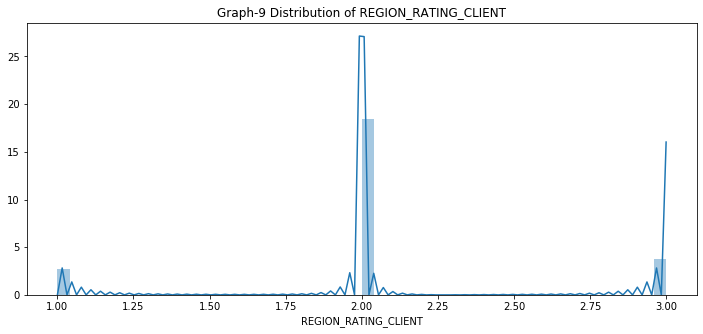

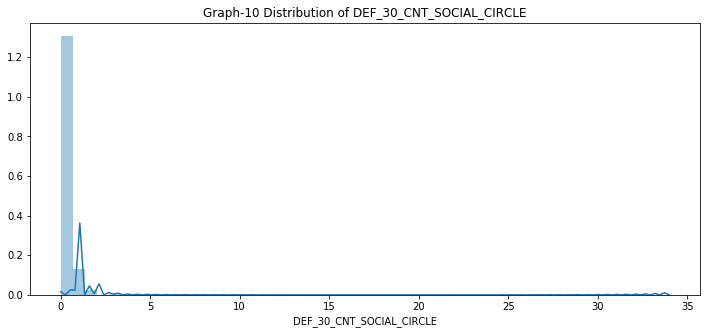

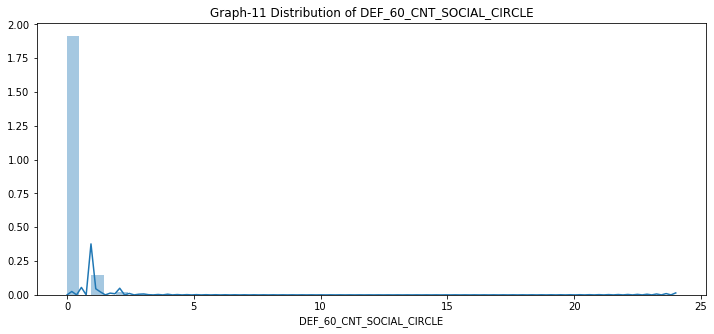

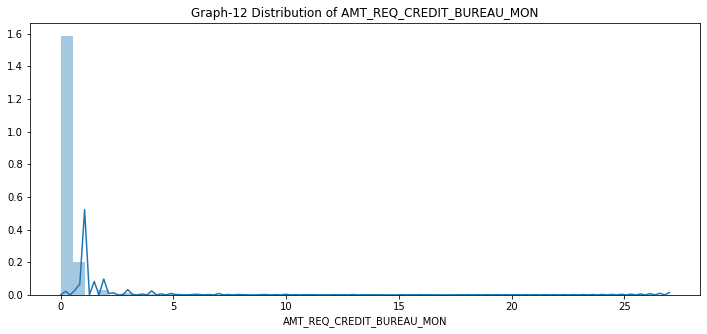

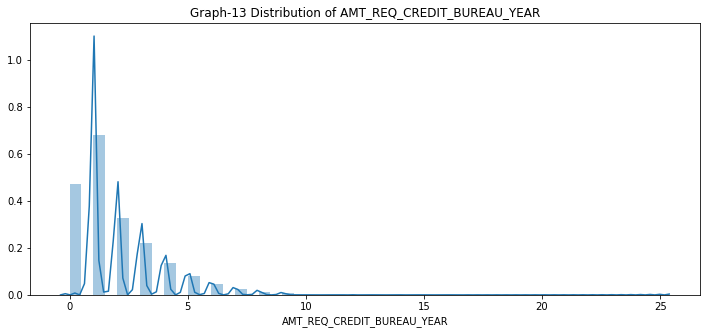

In [16]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
list_columns = list(tar_0_df.select_dtypes(include=numerics).columns)
list_columns.remove("TARGET")
i = 1

for item in list_columns:
    plt.figure(figsize=(12,5))
    plt.title("Graph-{0} Distribution of ".format(str(i)) + str(item))
    ax = sns.distplot(tar_0_df[item])
    i = i+1
    
# Add legend, xlabel, ylabel for each plot

<b> Reason for choosing this graph: </b>
Bar Charts are best used for Univariate Analysis

<b> Analysis for all the above graphs: </b>
<br> <br>
<b>GRAPH-1:</b>  The people who have paid without any difficulties the most have no children

<b>GRAPH-2:</b>  We can observe that the Amout Income total is highly skewed and the mean falls on one side of the graph.

<b>GRAPH-3:</b>  Credited amount is evenly distributed.

<b>GRAPH-6:</b>  The number of days around 0 or around 350000 have paid with without any difficulties

<b>GRAPH-8:</b>  Clients or people having total of 2 family members have paid the loan without any difficulties which is similar with the analysis of GRAPH-1

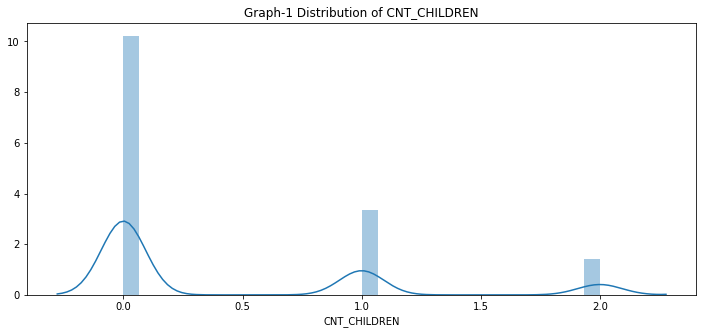

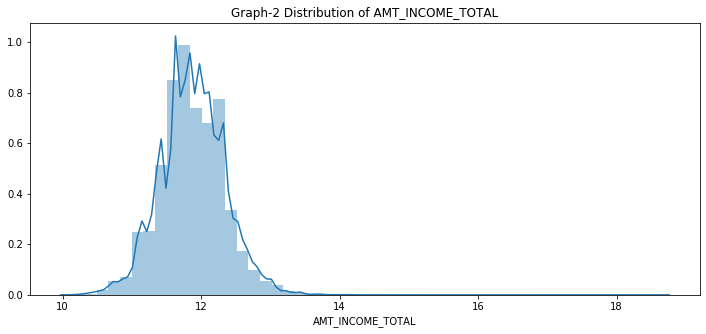

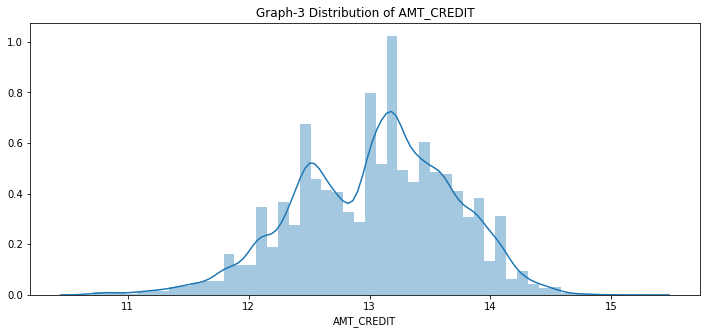

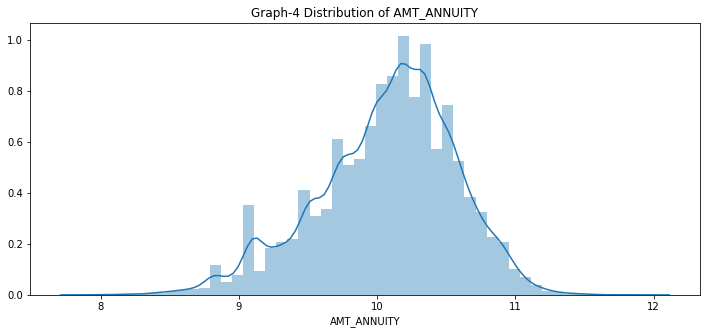

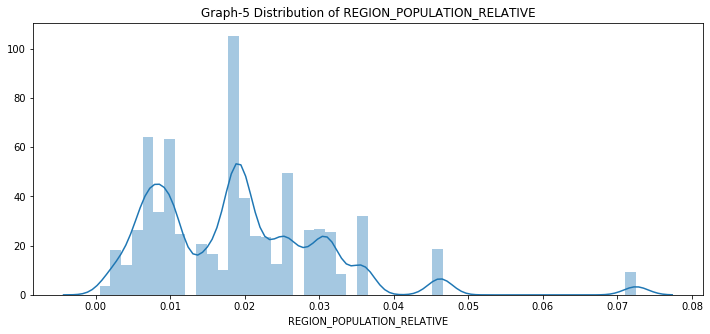

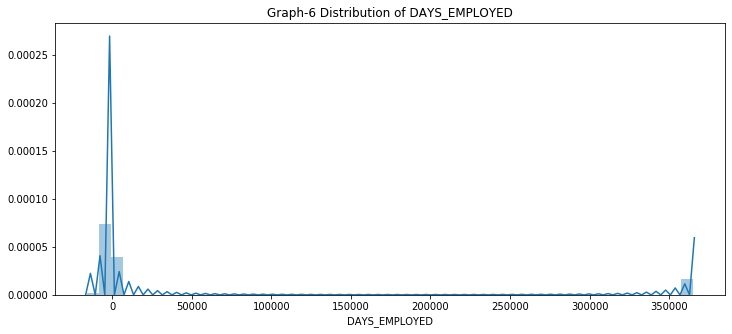

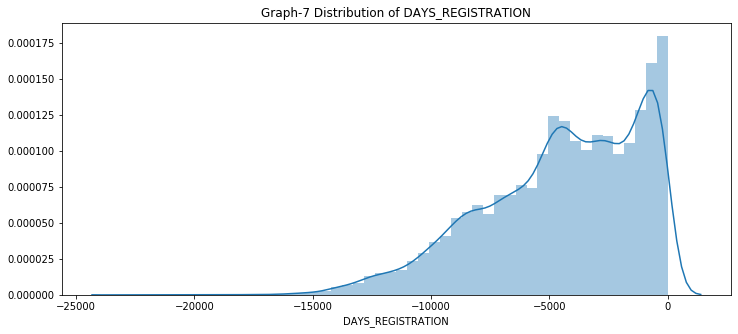

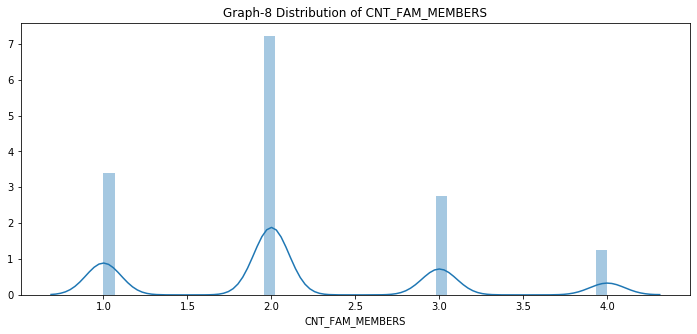

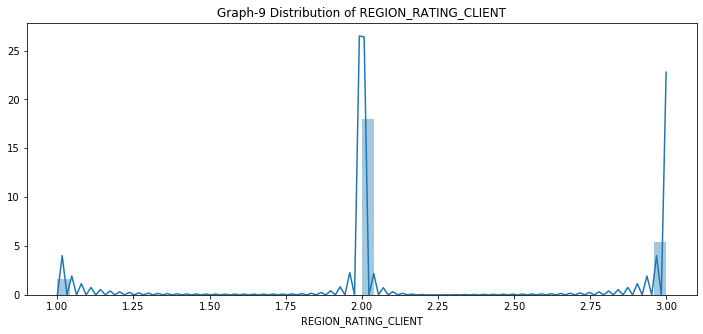

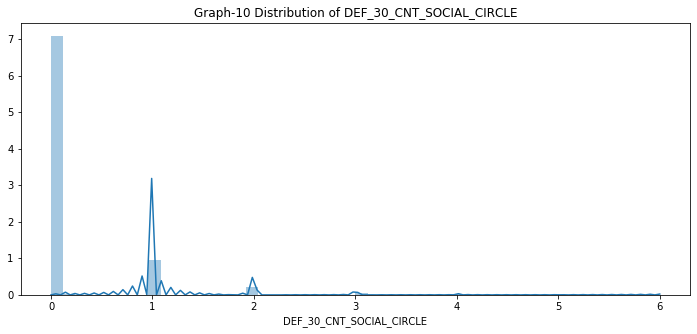

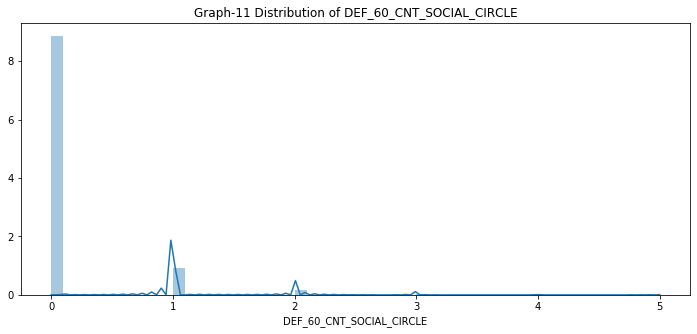

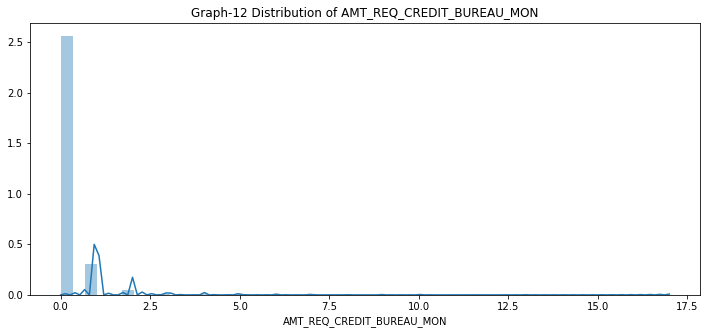

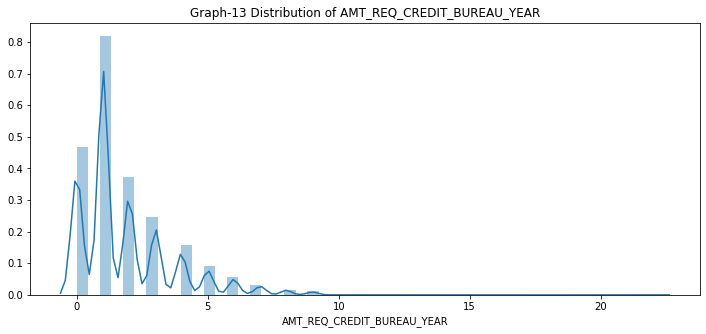

In [17]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
list_columns = list(tar_1_df.select_dtypes(include=numerics).columns)
list_columns.remove("TARGET")
i = 1

for item in list_columns:
    plt.figure(figsize=(12,5))
    plt.title("Graph-{0} Distribution of ".format(str(i)) + str(item))
    ax = sns.distplot(tar_1_df[item])
    i = i+1
    
# Add legend, xlabel, ylabel for each plot

<b> Reason for choosing this graph: </b>
Bar Charts are best used for Univariate Analysis

<b> Analysis for all the above graphs: </b>
<br> <br>
<b>GRAPH-1:</b>  The people who have defaulted the most have no children

<b>GRAPH-2:</b>  We can observe that the Amout Income total is highly skewed and the mean falls on one side of the graph.

<b>GRAPH-3:</b>  Credited amount is evenly distributed.

<b>GRAPH-6:</b>  The number of days around 0 or around 350000 have defaulted the most

<b>GRAPH-8:</b>  Clients or people having total of 2 family members have defaulted which is similar with the analysis of GRAPH-1

### Comaparing both Target 1 and Target 0 graphs

- All the variables performed alomost similarly in both the scenarios

- It becomes difficult for to exactly say based on this as to who could have defaulted

<b> One of the Reasons why they are giving the same results is because of the Imabalance in the Target Variable</b>

### Bivariate Analysis

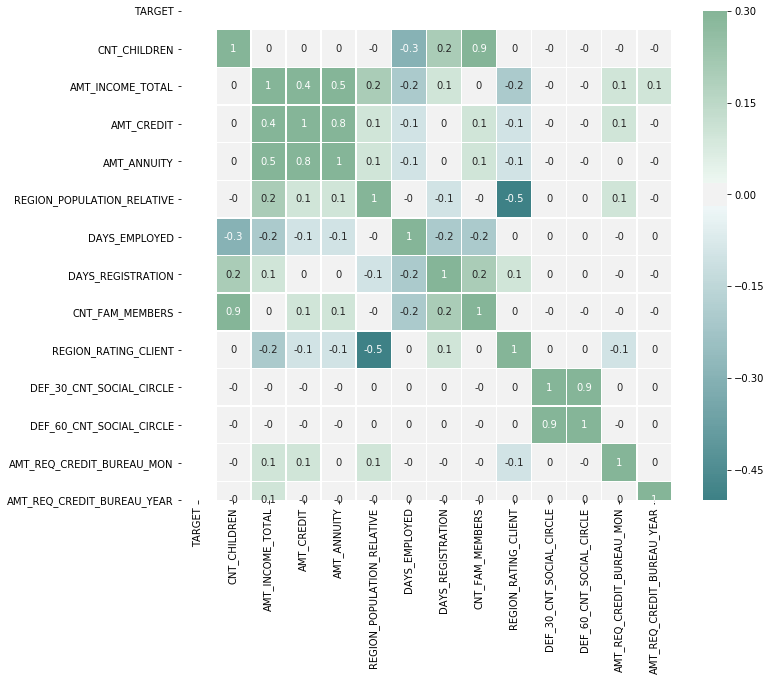

In [18]:
# Creating a heat map for the numerical columns
corr = round(tar_0_df.corr(),1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 500, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, linewidths=.5, annot=True)

<b> Reason for choosing this graph: </b>
Heat Maps are best used for correlation of variables

In [19]:
c = corr.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
print(so)

AMT_REQ_CREDIT_BUREAU_YEAR  CNT_CHILDREN                  0.0
DAYS_REGISTRATION           AMT_REQ_CREDIT_BUREAU_YEAR    0.0
                            AMT_REQ_CREDIT_BUREAU_MON     0.0
                            DEF_60_CNT_SOCIAL_CIRCLE      0.0
                            DEF_30_CNT_SOCIAL_CIRCLE      0.0
DEF_60_CNT_SOCIAL_CIRCLE    REGION_POPULATION_RELATIVE    0.0
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_MON     0.0
DEF_60_CNT_SOCIAL_CIRCLE    DAYS_EMPLOYED                 0.0
DAYS_REGISTRATION           AMT_ANNUITY                   0.0
                            AMT_CREDIT                    0.0
AMT_REQ_CREDIT_BUREAU_MON   AMT_REQ_CREDIT_BUREAU_YEAR    0.0
DAYS_EMPLOYED               AMT_REQ_CREDIT_BUREAU_YEAR    0.0
                            AMT_REQ_CREDIT_BUREAU_MON     0.0
                            DEF_60_CNT_SOCIAL_CIRCLE      0.0
                            DEF_30_CNT_SOCIAL_CIRCLE      0.0
                            REGION_RATING_CLIENT          0.0
DEF_60_C

### Top 10 Correlations from the above plot:

- CNT_FAM_MEMBERS and CNT_CHILDREN
- DEF_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE
- AMT_CREDIT and AMT_ANNUITY
- REGION_POPULATION_RELATIVE and REGION_RATING_CLIENT
- AMT_ANNUITY and AMT_INCOME_TOTAL
- AMT_INCOME_TOTAL and AMT_CREDIT
- DAYS_EMPLOYED and CNT_CHILDREN
- DAYS_REGISTRATION and DAYS_EMPLOYED
- CNT_FAM_MEMBERS and DAYS_EMPLOYED
- CNT_FAM_MEMBERS and DAYS_REGISTRATION
- AMT_INCOME_TOTAL and REGION_RATING_CLIENT

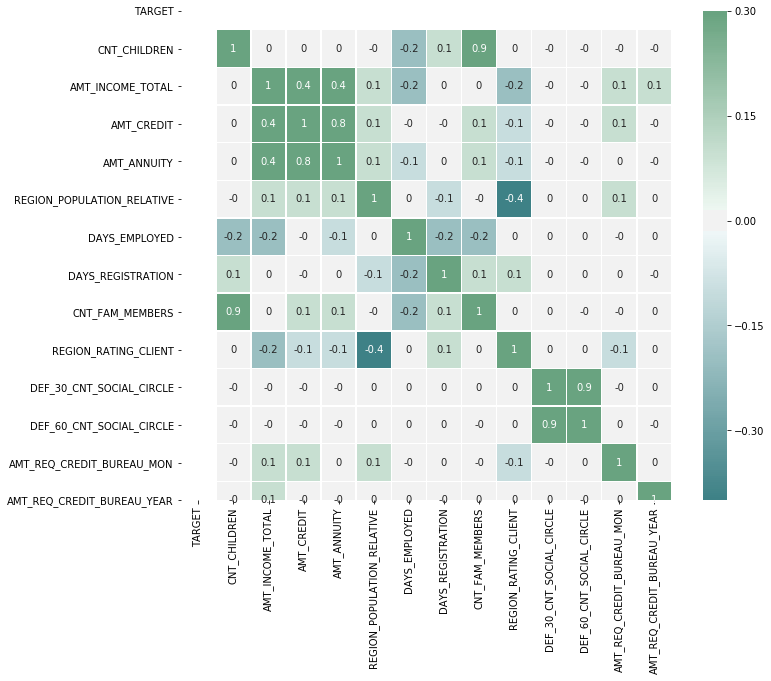

In [20]:
# Creating a heat map for the numerical columns
corr = round(tar_1_df.corr(),1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 500, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, linewidths=.5, annot=True)

<b> Reason for choosing this graph: </b>
Heat Maps are best used for correlation of variables

In [21]:
c = corr.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
print(so)

AMT_REQ_CREDIT_BUREAU_YEAR  CNT_CHILDREN                  0.0
DAYS_EMPLOYED               AMT_REQ_CREDIT_BUREAU_MON     0.0
                            DEF_60_CNT_SOCIAL_CIRCLE      0.0
                            DEF_30_CNT_SOCIAL_CIRCLE      0.0
                            REGION_RATING_CLIENT          0.0
DEF_30_CNT_SOCIAL_CIRCLE    AMT_ANNUITY                   0.0
                            REGION_POPULATION_RELATIVE    0.0
AMT_REQ_CREDIT_BUREAU_YEAR  DAYS_REGISTRATION             0.0
DAYS_EMPLOYED               REGION_POPULATION_RELATIVE    0.0
DEF_30_CNT_SOCIAL_CIRCLE    DAYS_EMPLOYED                 0.0
DAYS_EMPLOYED               AMT_CREDIT                    0.0
                            AMT_REQ_CREDIT_BUREAU_YEAR    0.0
DEF_30_CNT_SOCIAL_CIRCLE    DAYS_REGISTRATION             0.0
REGION_POPULATION_RELATIVE  AMT_REQ_CREDIT_BUREAU_YEAR    0.0
DEF_30_CNT_SOCIAL_CIRCLE    REGION_RATING_CLIENT          0.0
REGION_POPULATION_RELATIVE  DEF_60_CNT_SOCIAL_CIRCLE      0.0
        

### Top 10 Correlations from the above plot:

- CNT_FAM_MEMBERS and CNT_CHILDREN
- DEF_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE
- AMT_CREDIT and AMT_ANNUITY
- REGION_POPULATION_RELATIVE and REGION_RATING_CLIENT
- AMT_ANNUITY and AMT_INCOME_TOTAL
- AMT_INCOME_TOTAL and AMT_CREDIT
- DAYS_EMPLOYED and AMT_INCOME_TOTAL
- DAYS_REGISTRATION and DAYS_EMPLOYED
- CNT_FAM_MEMBERS and DAYS_EMPLOYED
- CNT_FAM_MEMBERS and DAYS_REGISTRATION
- AMT_INCOME_TOTAL and REGION_RATING_CLIENT

### Binning of continuous variables

The two columns that can be used for binning are:

- AMT_INCOME_TOTAL
- AMT_CREDIT

The binning on the above variables is done on Quantile range 

In [22]:
df = new_applicatn_df.set_index("SK_ID_CURR")

# Binning Total Income Amount

# Getting all the desired quantiles
quantle_20 = df["AMT_INCOME_TOTAL"].quantile(.2)
quantle_50 = df["AMT_INCOME_TOTAL"].quantile(.5)
quantle_85 = df["AMT_INCOME_TOTAL"].quantile(.85)
quantle_1 = df["AMT_INCOME_TOTAL"].quantile(1)

# Creating the bins
bins = [0, quantle_20, quantle_50, quantle_85, quantle_1]

# Creating a new binned variable and setting the values
df['binned_AMT_INCOME'] = pd.cut(df['AMT_INCOME_TOTAL'], bins, labels=["Low", "Average", "Above Average", "High"])

# Getting all the desired quantiles
quantle_20 = df["AMT_INCOME_TOTAL"].quantile(.2)
quantle_50 = df["AMT_INCOME_TOTAL"].quantile(.5)
quantle_85 = df["AMT_INCOME_TOTAL"].quantile(.85)
quantle_1 = df["AMT_INCOME_TOTAL"].quantile(1)

# Creating the bins
bins = [0, quantle_20, quantle_50, quantle_85, quantle_1]

# Creating a new binned variable and setting the values
df['binned_AMT_CREDIT'] = pd.cut(df['AMT_CREDIT'], bins, labels=["Low", "Average", "Above Average", "High"])
df[["binned_AMT_CREDIT", "binned_AMT_INCOME"]].head()

,binned_AMT_CREDIT,binned_AMT_INCOME
SK_ID_CURR,,
100002,High,Above Average
100003,High,High
100004,Average,Low
100006,High,Average
100007,High,Average


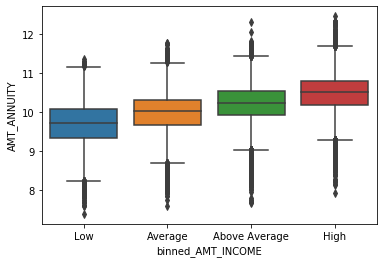

In [23]:
ax = sns.boxplot(x="binned_AMT_INCOME", y="AMT_ANNUITY", data=df)

<b> Reason for choosing this graph: </b>
Box Plots are best used for Bivariate Analysis after Correlation plots

<b> Analysis: </b>
The above graph is about the Amout Annuity based on the clients category of Income

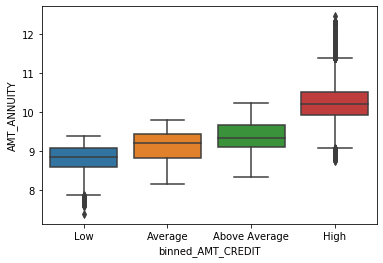

In [24]:
ax = sns.boxplot(x="binned_AMT_CREDIT", y="AMT_ANNUITY", data=df)

<b> Reason for choosing this graph: </b>
Box Plots are best used for Bivariate Analysis after Correlation plots

<b> Analysis: </b>
The above graph is about the Amout Annuity based on the clients category of Amount Credited

## Part-2: Analysis on Previous Application Data

### Extracting Data for Part-2

In [25]:
app_df_temp = new_applicatn_df[['SK_ID_CURR','TARGET','AMT_INCOME_TOTAL']]
previous_app_df = pd.read_csv(path + "previous_application.csv") 

### Data Cleaning for Part-2

In [26]:
prev_applicatn_df = pd.merge(app_df_temp,previous_app_df, how='inner', on='SK_ID_CURR')
# We used "INNER" merge as we want to check how likely are clients do not default given the previous 
# application details

# filling it with 0 since most columns with na have unprocesed loans so no annuity
prev_applicatn_df['AMT_ANNUITY'].fillna(0, inplace=True)
prev_applicatn_df['AMT_CREDIT'].fillna(0, inplace=True)
#  approved loans have very less missing values for DAYS_FIRST_DRAWING less than 5 %missing values arnd 33500 for 10 lakh odd records
# the 5 lack odd records with status other than approved has major chunk of na values replacing all with zero

prev_applicatn_df['DAYS_FIRST_DRAWING'].fillna(0, inplace=True)
# same logic as bove for all these records

prev_applicatn_df['DAYS_LAST_DUE'].fillna(0, inplace=True)
prev_applicatn_df['DAYS_TERMINATION'].fillna(0, inplace=True)
prev_applicatn_df['DAYS_LAST_DUE_1ST_VERSION'].fillna(0, inplace=True)
#ONLY 3 RECORDS WITH APPROVED LOAN STATUS HAVE NA VALUES REST ALL UNAPPROVED LOANS HENCE CHANGIG TO 0

prev_applicatn_df['CNT_PAYMENT'].fillna(0, inplace=True)
#print(df4.isna().sum(axis = 0))

### Dividing Dataset into two dataframes based on Target variable

In [27]:
tar_prev_1_df = prev_applicatn_df[prev_applicatn_df["TARGET"]==1]
tar_prev_0_df = prev_applicatn_df[prev_applicatn_df["TARGET"]==0]

### Analysis & Graphs (Univariate and Bivariate)

<b> Graph-1: NAME_CONTRACT_TYPE </b>

Text(0.5, 1.0, 'ContractTypes of customers with payment difficulties')

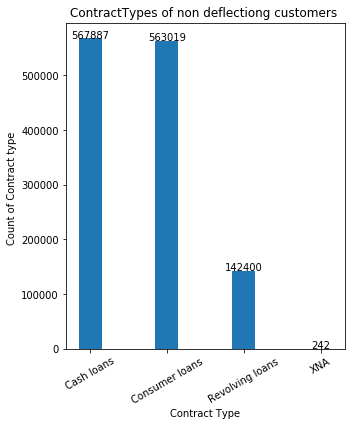

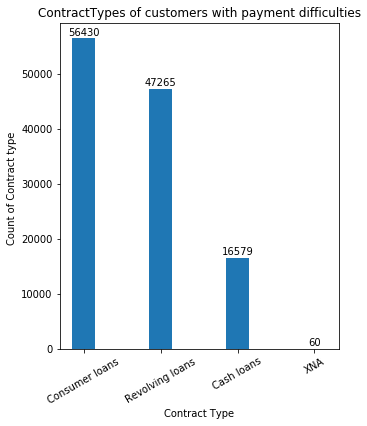

In [28]:
x = list(tar_prev_0_df['NAME_CONTRACT_TYPE'].value_counts())
label = list(tar_prev_0_df['NAME_CONTRACT_TYPE'].unique())

index = np.arange(len(x))
fig1 = plt.figure(figsize=(5,6))
width = 0.3  
plt.bar(index , x, width)
for xpos, ypos, yval in zip(index, x, x):
    plt.text(xpos, ypos+5500, yval, ha="center", va="center")
plt.xlabel('Contract Type')
plt.ylabel('Count of Contract type ')
plt.xticks(index, label, rotation=30)
plt.title('ContractTypes of non deflectiong customers ')


x = list(tar_prev_1_df['NAME_CONTRACT_TYPE'].value_counts())
label = list(tar_prev_1_df['NAME_CONTRACT_TYPE'].unique())

index = np.arange(len(x))
fig1 = plt.figure(figsize=(5,6))
width = 0.3  
plt.bar(index , x , width)
for xpos, ypos, yval in zip(index, x, x):
    plt.text(xpos, ypos+1100, yval, ha="center", va="center")
plt.xlabel('Contract Type')
plt.ylabel('Count of Contract type ')
plt.xticks(index, label, rotation=30)
plt.title('ContractTypes of customers with payment difficulties')

<b> Reason for choosing this graph: </b>
Bar Plot is best used for Univariate Analysis. 

<b> Analysis: </b> Revolving type loans have a significantly higher risk of non payments.It is higher than even the paid loans of revolving type

<b> Graph-2: NAME_GOODS_CATEGORY </b>

Text(0.5, 1.0, 'GOODS CATEGORY for customers with payment issues')

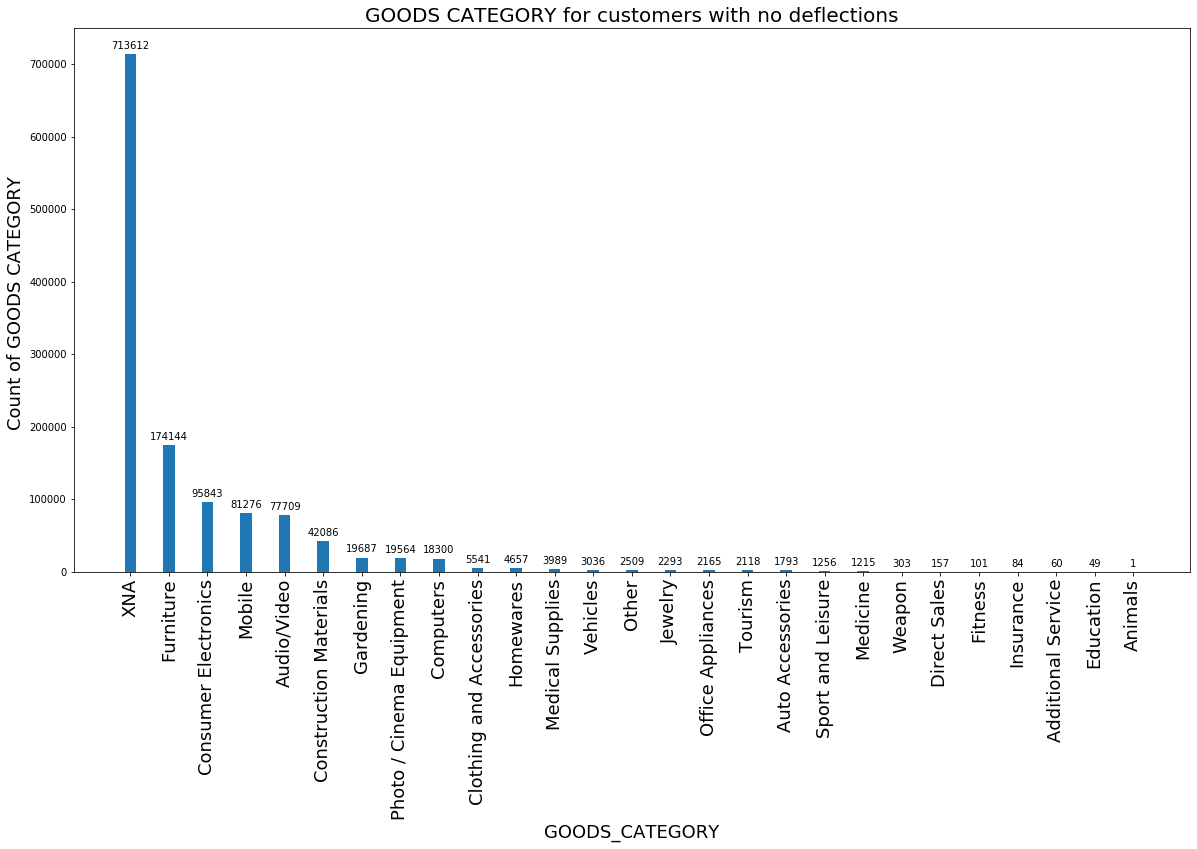

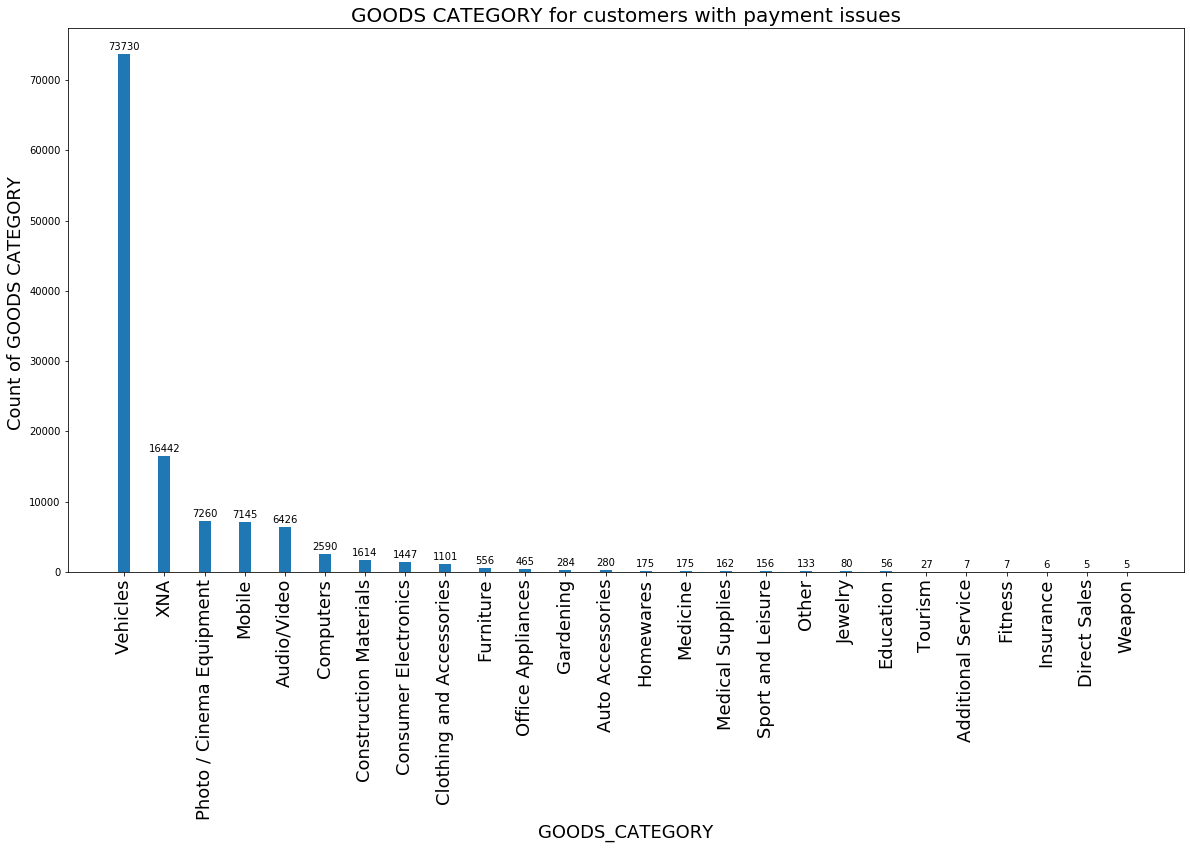

In [29]:
x = list(tar_prev_0_df['NAME_GOODS_CATEGORY'].value_counts())
label = list(tar_prev_0_df['NAME_GOODS_CATEGORY'].unique())

index = np.arange(len(x))
fig1 = plt.figure(figsize=(20,10))
width = 0.3  
plt.bar(index , x, width)
for xpos, ypos, yval in zip(index, x, x):
    plt.text(xpos, ypos+11100, yval, ha="center", va="center")
plt.xlabel('GOODS_CATEGORY', fontsize=18)
plt.ylabel('Count of GOODS CATEGORY ', fontsize=18)
plt.xticks(index, label, fontsize=18, rotation=90)
plt.title('GOODS CATEGORY for customers with no deflections', fontsize=20)


x = list(tar_prev_1_df['NAME_GOODS_CATEGORY'].value_counts())
label = list(tar_prev_1_df['NAME_GOODS_CATEGORY'].unique())

index = np.arange(len(x))
fig1 = plt.figure(figsize=(20,10))
width = 0.3  
plt.bar(index , x, width)
for xpos, ypos, yval in zip(index, x, x):
    plt.text(xpos, ypos+1000, yval, ha="center", va="center")
plt.xlabel('GOODS_CATEGORY', fontsize=18)
plt.ylabel('Count of GOODS CATEGORY ', fontsize=18)
plt.xticks(index, label, fontsize=18, rotation=90)
plt.title('GOODS CATEGORY for customers with payment issues', fontsize=20)

<b> Reason for choosing this graph: </b>
Bar Plot is best used for Univariate Analysis. 

<b> Analysis: </b> Loan given to purchase vehicles have a high risk of not being repaid next risky segment is for photo equipment and mobiles with nearly 25 % unreturned loans . Furniture, XNA loans are low risk

<b> GRAPH-3: NAME_YIELD_GROUP </b>

Text(0.5, 1.0, 'CATEGORY OF INTEREST RATE ( YIELD) for customers with payment issues')

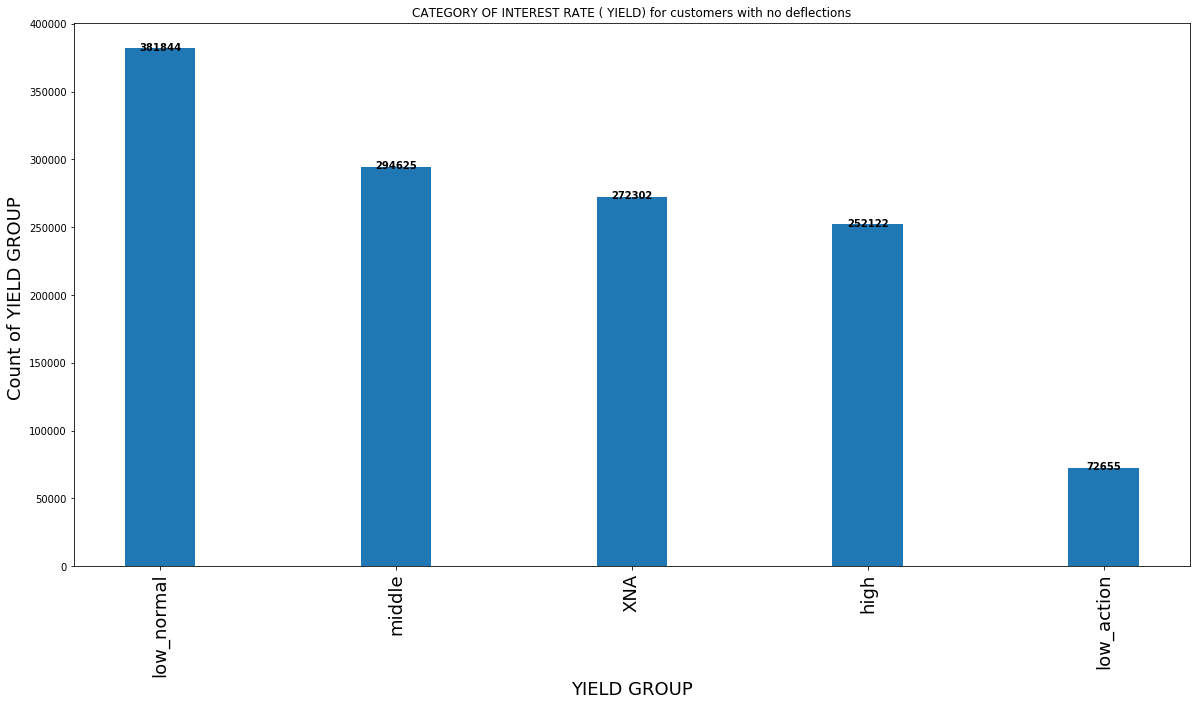

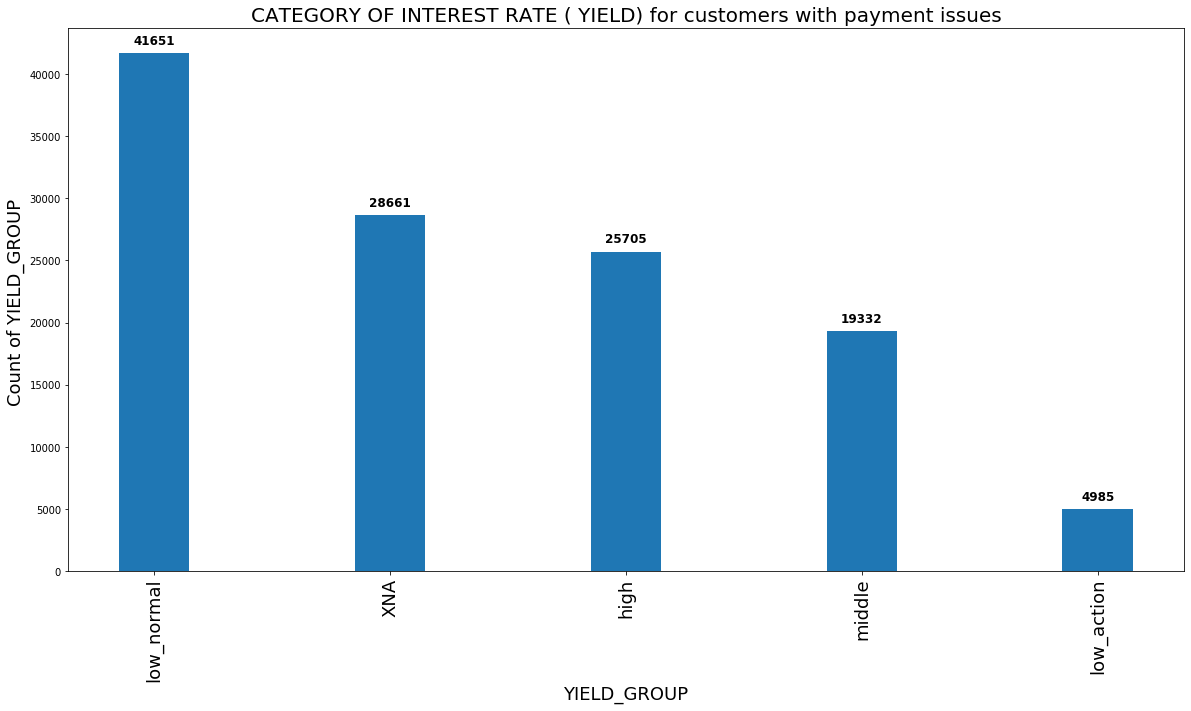

In [30]:
x = list(tar_prev_0_df['NAME_YIELD_GROUP'].value_counts())
label = list(tar_prev_0_df['NAME_YIELD_GROUP'].unique())
#num_bins = df2['NAME_CONTRACT_TYPE'].nunique()
index = np.arange(len(x))
fig1 = plt.figure(figsize=(20,10))
width = 0.3  
plt.bar(index , x, width)
for xpos, ypos, yval in zip(index, x, x):
    plt.text(xpos, ypos+1000, yval, ha="center", va="center" ,fontweight='bold')
plt.xlabel('YIELD GROUP', fontsize=18)
plt.ylabel('Count of YIELD GROUP ', fontsize=18)
plt.xticks(index, label, fontsize=18, rotation=90)
plt.title('CATEGORY OF INTEREST RATE ( YIELD) for customers with no deflections')


x = list(tar_prev_1_df['NAME_YIELD_GROUP'].value_counts())
label = list(tar_prev_1_df['NAME_YIELD_GROUP'].unique())
#num_bins = df2['NAME_CONTRACT_TYPE'].nunique()
index = np.arange(len(x))
fig1 = plt.figure(figsize=(20,10))
width = 0.3  
plt.bar(index , x, width)
for xpos, ypos, yval in zip(index, x, x):
    plt.text(xpos, ypos+1000, yval, ha="center", va="center" ,fontsize=12, fontweight='bold')
plt.xlabel('YIELD_GROUP', fontsize=18)
plt.ylabel('Count of YIELD_GROUP ', fontsize=18)
plt.xticks(index, label, fontsize=18, rotation=90)
plt.title('CATEGORY OF INTEREST RATE ( YIELD) for customers with payment issues', fontsize=20)

<b> Reason for choosing this graph: </b>
Bar Plot is best used for Univariate Analysis. 

<b> Analysis: </b> All yield groups have nearly 10% risk which is consistent with the data distribution. As expected low risk groups have a much better percentage of returns.

<b> GRAPH-4: NAME_CLIENT_TYPE </b>

Text(0.5, 1.0, 'CLIENT TYPES OF customers with payment issues')

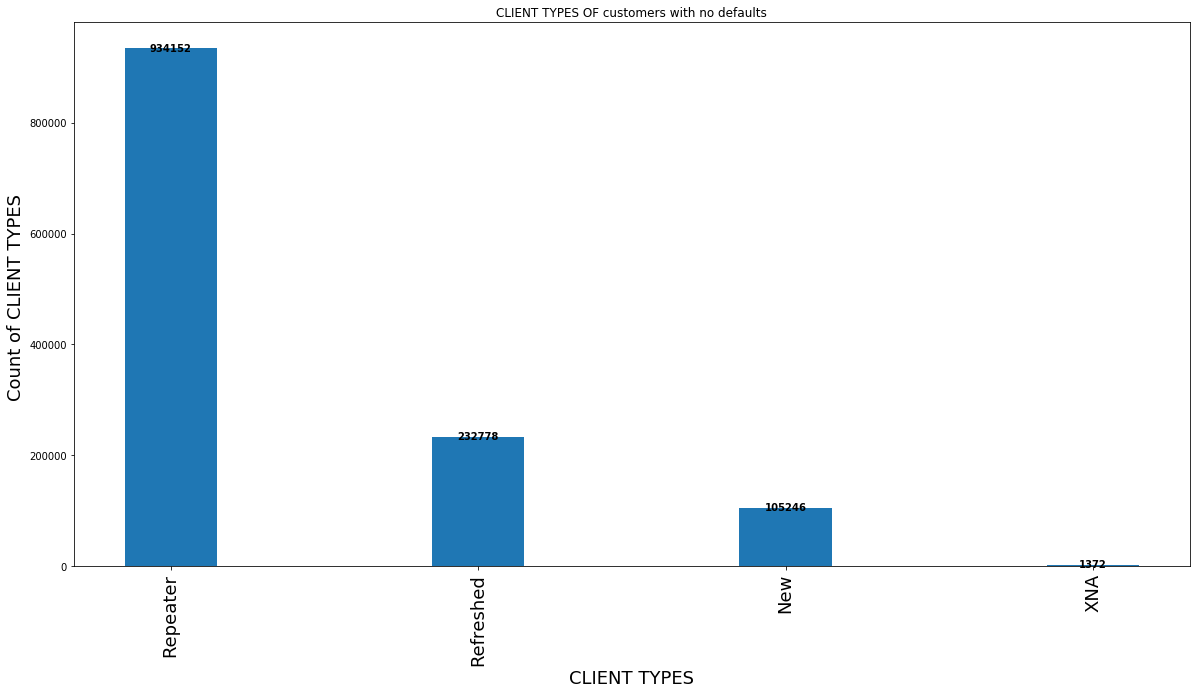

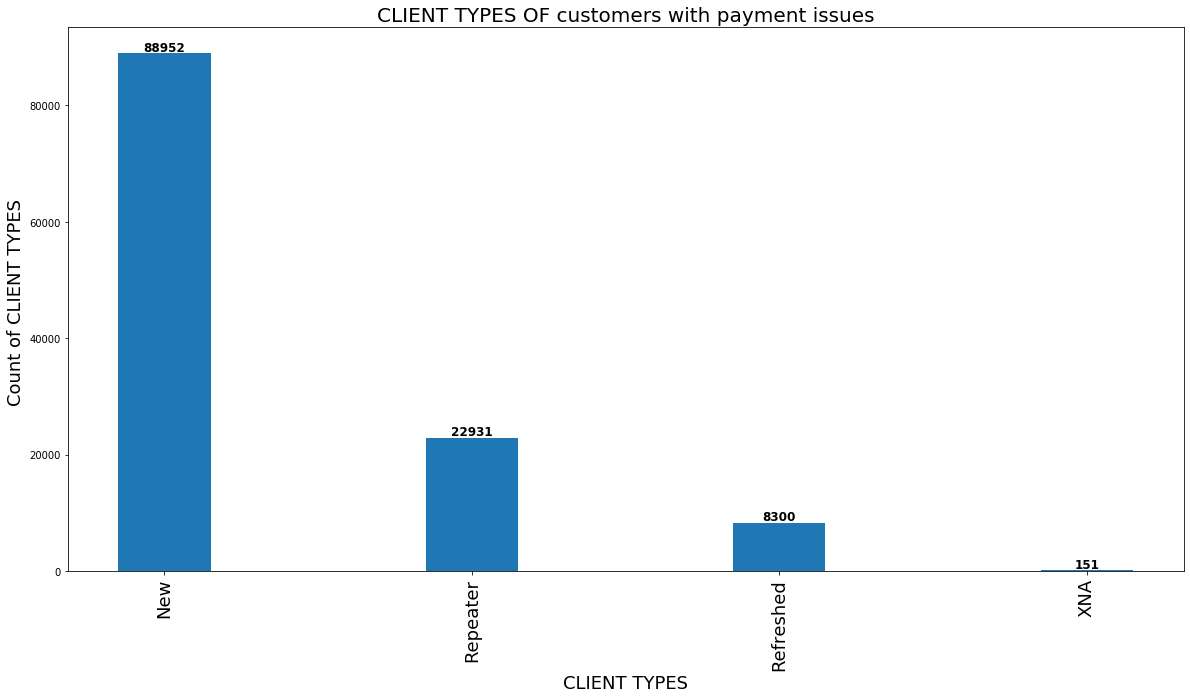

In [31]:
x = list(tar_prev_0_df['NAME_CLIENT_TYPE'].value_counts())
label = list(tar_prev_0_df['NAME_CLIENT_TYPE'].unique())
#num_bins = df2['NAME_CONTRACT_TYPE'].nunique()
index = np.arange(len(x))
fig1 = plt.figure(figsize=(20,10))
width = 0.3  
plt.bar(index , x, width)
for xpos, ypos, yval in zip(index, x, x):
    plt.text(xpos, ypos+1000, yval, ha="center", va="center" ,fontweight='bold')
plt.xlabel('CLIENT TYPES', fontsize=18)
plt.ylabel('Count of CLIENT TYPES ', fontsize=18)
plt.xticks(index, label, fontsize=18, rotation=90)
plt.title('CLIENT TYPES OF customers with no defaults')


x = list(tar_prev_1_df['NAME_CLIENT_TYPE'].value_counts())
label = list(tar_prev_1_df['NAME_CLIENT_TYPE'].unique())
#num_bins = df2['NAME_CONTRACT_TYPE'].nunique()
index = np.arange(len(x))
fig1 = plt.figure(figsize=(20,10))
width = 0.3  
plt.bar(index , x, width)
for xpos, ypos, yval in zip(index, x, x):
    plt.text(xpos, ypos+1000, yval, ha="center", va="center", fontsize=12, fontweight='bold')
plt.xlabel('CLIENT TYPES', fontsize=18)
plt.ylabel('Count of CLIENT TYPES ', fontsize=18)
plt.xticks(index, label, fontsize=18, rotation=90)
plt.title('CLIENT TYPES OF customers with payment issues', fontsize=20)

<b> Reason for choosing this graph: </b>
Bar Plot is best used for Univariate Analysis. 

<b> Analysis: </b> New clients are riskier. They have a nearly 50 % chance of not repaying. Repeated clients are safer and have around 3% non returned loans

<b> GRAPH-5: NAME_SELLER_INDUSTRY </b>

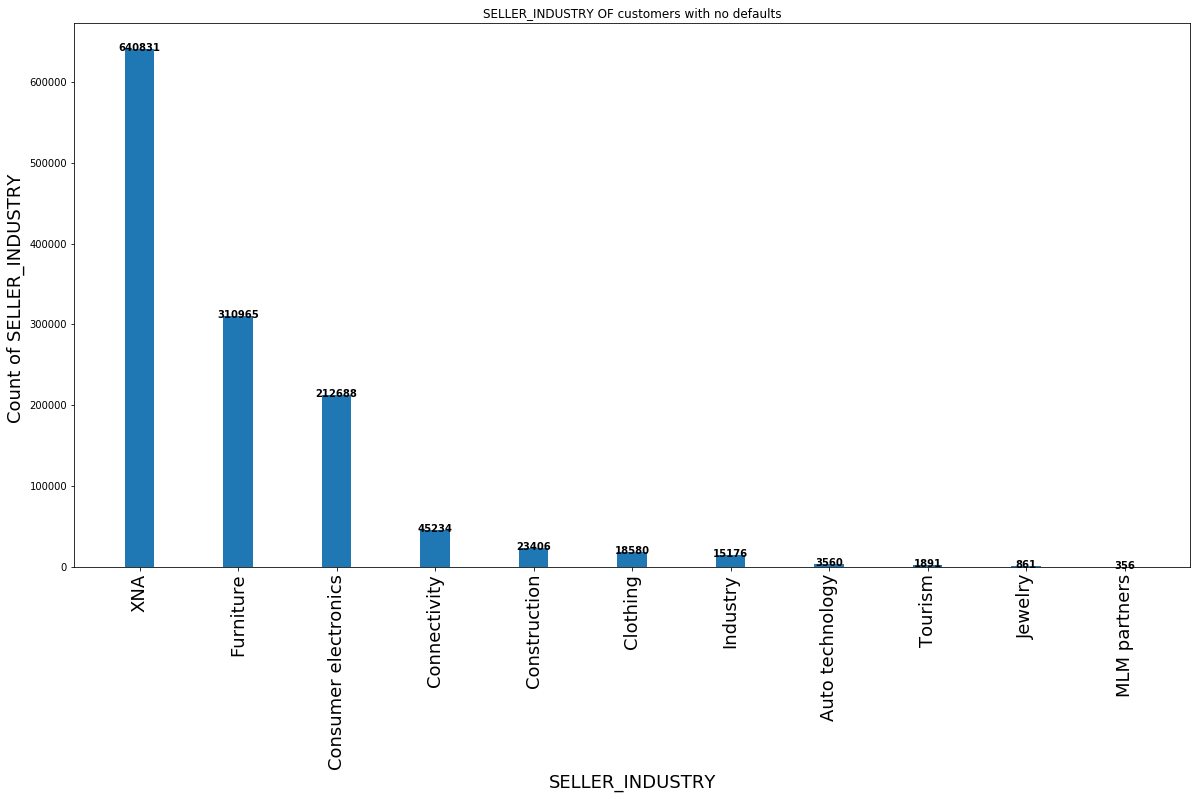

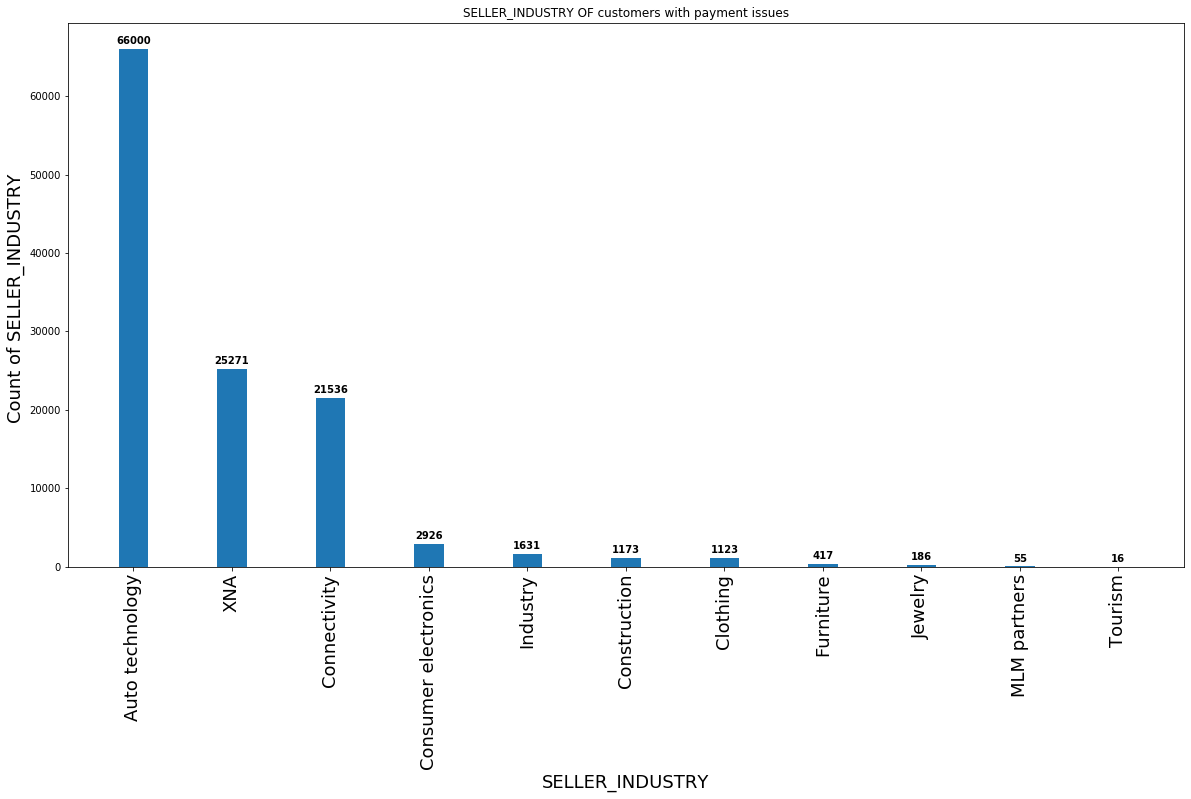

In [32]:
x = list(tar_prev_0_df['NAME_SELLER_INDUSTRY'].value_counts())
label = list(tar_prev_0_df['NAME_SELLER_INDUSTRY'].unique())
#num_bins = df2['NAME_CONTRACT_TYPE'].nunique()
index = np.arange(len(x))
fig1 = plt.figure(figsize=(20,10))
width = 0.3  
plt.bar(index , x, width)
for xpos, ypos, yval in zip(index, x, x):
    plt.text(xpos, ypos+1000, yval, ha="center", va="center" ,fontweight='bold')
plt.xlabel('SELLER_INDUSTRY', fontsize=18)
plt.ylabel('Count of SELLER_INDUSTRY ', fontsize=18)
plt.xticks(index, label, fontsize=18, rotation=90)
plt.title('SELLER_INDUSTRY OF customers with no defaults')

x = list(tar_prev_1_df['NAME_SELLER_INDUSTRY'].value_counts())
label = list(tar_prev_1_df['NAME_SELLER_INDUSTRY'].unique())
#num_bins = df2['NAME_CONTRACT_TYPE'].nunique()
index = np.arange(len(x))
fig1 = plt.figure(figsize=(20,10))
width = 0.3  
plt.bar(index , x, width)
for xpos, ypos, yval in zip(index, x, x):
    plt.text(xpos, ypos+1000, yval, ha="center", va="center" ,fontweight='bold')
plt.xlabel('SELLER_INDUSTRY', fontsize=18)
plt.ylabel('Count of SELLER_INDUSTRY ', fontsize=18)
plt.xticks(index, label, fontsize=18, rotation=90)
plt.title('SELLER_INDUSTRY OF customers with payment issues')

<b> Reason for choosing this graph: </b>
Bar Plot is best used for Univariate Analysis. 

<b> Analysis: </b> Auto loans and Connectivity are two high risk areas. Auto loans are mostly hard to recover Connectivity sector has a 50% failure rate

<b> GRAPH-6: NAME PORTFOLIO </b>

Text(0.5, 1.0, 'PREVIOUS LOAN REASONS  OF customers with payment issues')

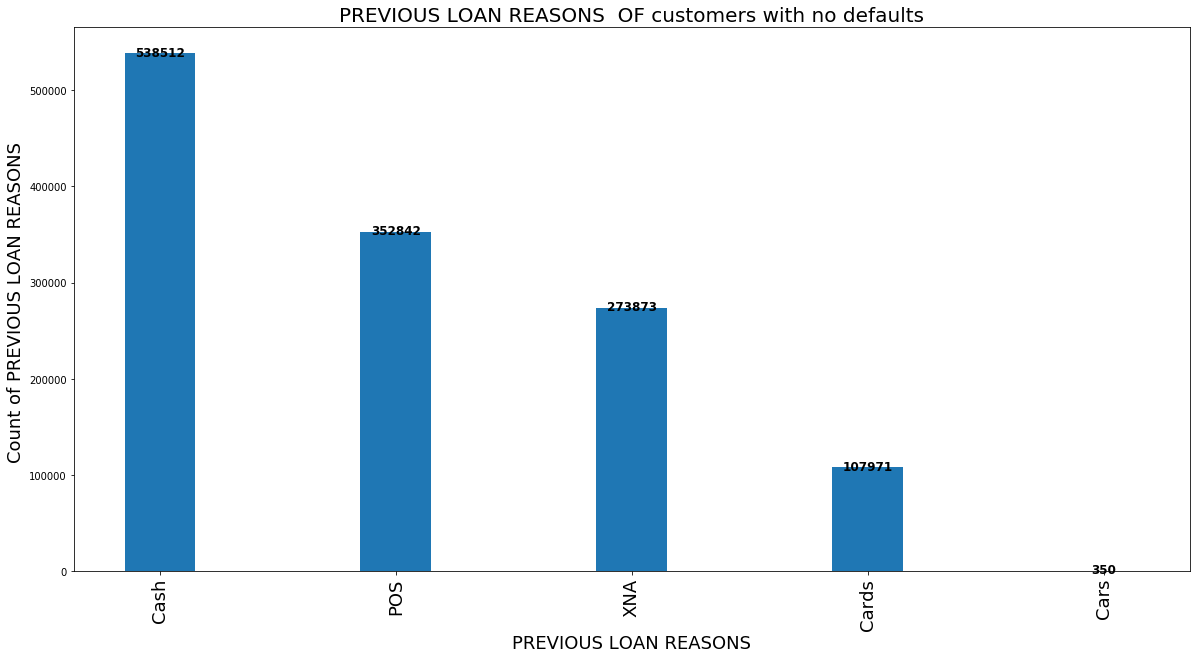

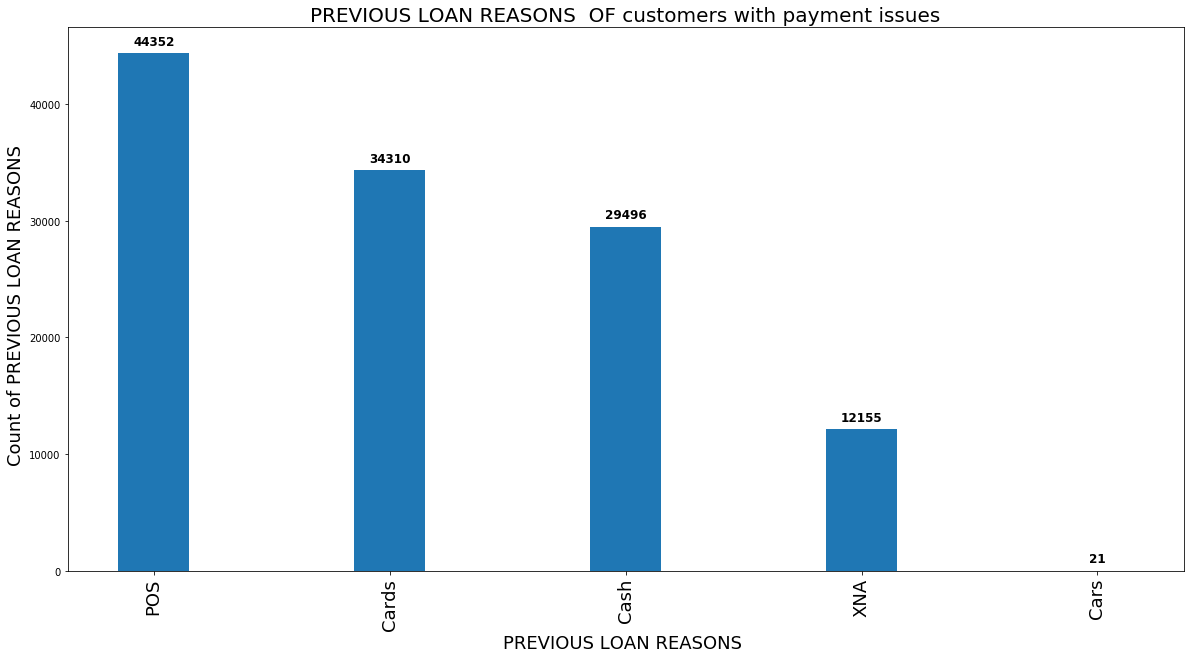

In [33]:
x = list(tar_prev_0_df['NAME_PORTFOLIO'].value_counts())
label = list(tar_prev_0_df['NAME_PORTFOLIO'].unique())
#num_bins = df2['NAME_CONTRACT_TYPE'].nunique()
index = np.arange(len(x))
fig1 = plt.figure(figsize=(20,10))
width = 0.3  
plt.bar(index , x, width)
for xpos, ypos, yval in zip(index, x, x):
    plt.text(xpos, ypos+1000, yval, ha="center", va="center", fontsize=12, fontweight='bold')
plt.xlabel('PREVIOUS LOAN REASONS', fontsize=18)
plt.ylabel('Count of PREVIOUS LOAN REASONS ', fontsize=18)
plt.xticks(index, label, fontsize=18, rotation=90)
plt.title('PREVIOUS LOAN REASONS  OF customers with no defaults', fontsize=20)


x = list(tar_prev_1_df['NAME_PORTFOLIO'].value_counts())
label = list(tar_prev_1_df['NAME_PORTFOLIO'].unique())
#num_bins = df2['NAME_CONTRACT_TYPE'].nunique()
index = np.arange(len(x))
fig1 = plt.figure(figsize=(20,10))
width = 0.3  
plt.bar(index , x, width)
for xpos, ypos, yval in zip(index, x, x):
    plt.text(xpos, ypos+1000, yval, ha="center", va="center", fontsize=12, fontweight='bold')
plt.xlabel('PREVIOUS LOAN REASONS ', fontsize=18)
plt.ylabel('Count of PREVIOUS LOAN REASONS  ', fontsize=18)
plt.xticks(index, label, fontsize=18, rotation=90)
plt.title('PREVIOUS LOAN REASONS  OF customers with payment issues', fontsize=20)

<b> Reason for choosing this graph: </b>
Bar Plot is best used for Univariate Analysis. 

<b> Analysis: </b> Card loans have the highest risk at around 30% recovery difficulties are detected. Cash loans are safer and POS Loans have highest number of recovery difficulties

<b> GRAPH-7: CREDIT AMOUNT VARIANCES </b>

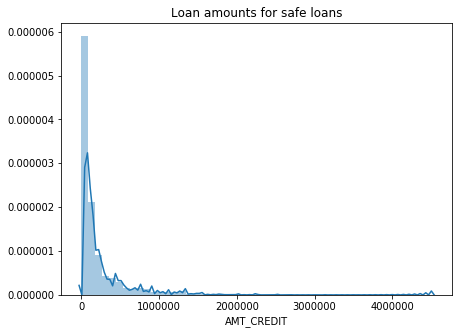

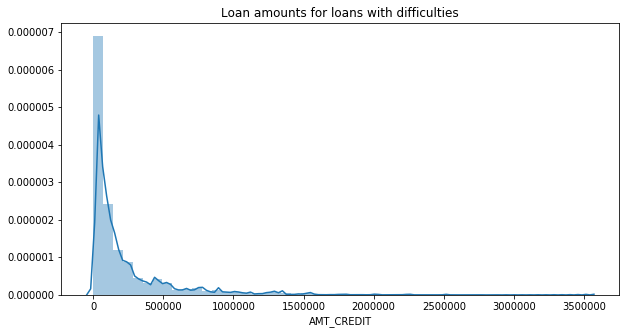

In [34]:
# credit amount variance 
plt.figure(figsize=(7,5))
plt.title('Loan amounts for safe loans')
sns.distplot(tar_prev_0_df['AMT_CREDIT'])

plt.figure(figsize=(10,5))
plt.title('Loan amounts for loans with difficulties')
sns.distplot(tar_prev_1_df['AMT_CREDIT'])

<b> Reason for choosing this graph: </b>
Bar Plot is best used for Univariate Analysis. 

<b> Analysis: </b> The distribution of data is same for both types of customers.No particular loan amount carries additional risks

The data has very high outliers compared to the median value.We noticed that all loan amounts have the same risk in previous analysis.

#### Correlation Plots

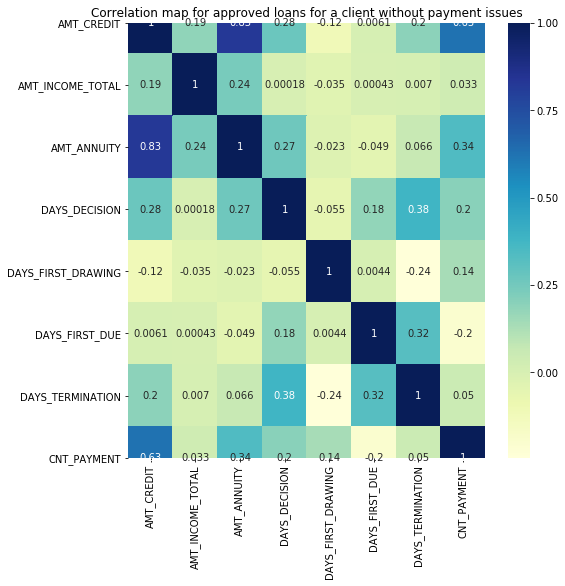

<Figure size 432x288 with 0 Axes>

In [35]:
#correlation between

tar_prev_0_df_1 = tar_prev_0_df.loc[(tar_prev_0_df.NAME_CONTRACT_STATUS == 'Approved'), :]

corrdata = tar_prev_0_df_1[['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_DECISION',
                'DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_TERMINATION','CNT_PAYMENT']]
cor = corrdata.corr()

plt.figure(figsize=(8,8))

sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.title('Correlation map for approved loans for a client without payment issues')
plt.show()

In [36]:
print('Correlation map for approved loans for a client without payment difficulties')
print()
c = cor.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
print(so)

Correlation map for approved loans for a client without payment difficulties

DAYS_DECISION       AMT_INCOME_TOTAL      0.000184
AMT_INCOME_TOTAL    DAYS_DECISION         0.000184
DAYS_FIRST_DUE      AMT_INCOME_TOTAL      0.000428
AMT_INCOME_TOTAL    DAYS_FIRST_DUE        0.000428
DAYS_FIRST_DRAWING  DAYS_FIRST_DUE        0.004389
DAYS_FIRST_DUE      DAYS_FIRST_DRAWING    0.004389
AMT_CREDIT          DAYS_FIRST_DUE        0.006136
DAYS_FIRST_DUE      AMT_CREDIT            0.006136
DAYS_TERMINATION    AMT_INCOME_TOTAL      0.006982
AMT_INCOME_TOTAL    DAYS_TERMINATION      0.006982
AMT_ANNUITY         DAYS_FIRST_DRAWING    0.023046
DAYS_FIRST_DRAWING  AMT_ANNUITY           0.023046
AMT_INCOME_TOTAL    CNT_PAYMENT           0.032963
CNT_PAYMENT         AMT_INCOME_TOTAL      0.032963
AMT_INCOME_TOTAL    DAYS_FIRST_DRAWING    0.034549
DAYS_FIRST_DRAWING  AMT_INCOME_TOTAL      0.034549
DAYS_FIRST_DUE      AMT_ANNUITY           0.049290
AMT_ANNUITY         DAYS_FIRST_DUE        0.049290
CNT_

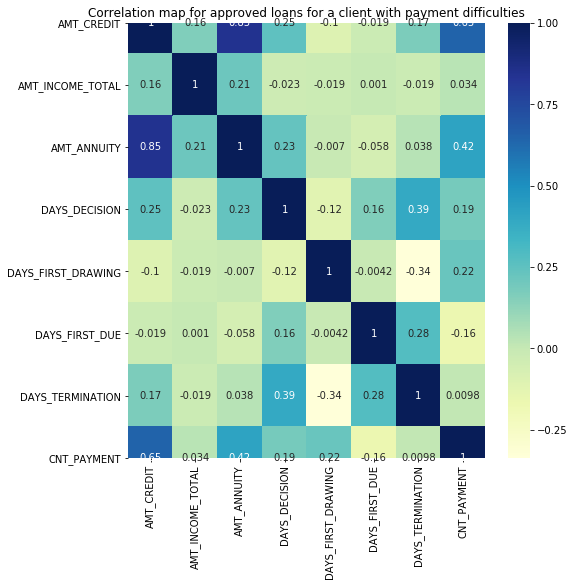

In [37]:
tar_prev_1_df_1 = tar_prev_1_df.loc[(tar_prev_1_df.NAME_CONTRACT_STATUS == 'Approved'), :]

corrdata = tar_prev_1_df_1[['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY',
                'DAYS_DECISION','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_TERMINATION','CNT_PAYMENT']]
cor = corrdata.corr()
#print(cor)
plt.figure(figsize=(8,8))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.title('Correlation map for approved loans for a client with payment difficulties')
plt.show()

In [38]:
print('Correlation map for approved loans for a client with payment difficulties')
print()
c = cor.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
print(so)

Correlation map for approved loans for a client with payment difficulties

DAYS_FIRST_DUE      AMT_INCOME_TOTAL      0.001031
AMT_INCOME_TOTAL    DAYS_FIRST_DUE        0.001031
DAYS_FIRST_DRAWING  DAYS_FIRST_DUE        0.004190
DAYS_FIRST_DUE      DAYS_FIRST_DRAWING    0.004190
DAYS_FIRST_DRAWING  AMT_ANNUITY           0.007024
AMT_ANNUITY         DAYS_FIRST_DRAWING    0.007024
DAYS_TERMINATION    CNT_PAYMENT           0.009801
CNT_PAYMENT         DAYS_TERMINATION      0.009801
AMT_INCOME_TOTAL    DAYS_FIRST_DRAWING    0.018746
DAYS_FIRST_DRAWING  AMT_INCOME_TOTAL      0.018746
DAYS_TERMINATION    AMT_INCOME_TOTAL      0.018825
AMT_INCOME_TOTAL    DAYS_TERMINATION      0.018825
DAYS_FIRST_DUE      AMT_CREDIT            0.019086
AMT_CREDIT          DAYS_FIRST_DUE        0.019086
AMT_INCOME_TOTAL    DAYS_DECISION         0.022996
DAYS_DECISION       AMT_INCOME_TOTAL      0.022996
CNT_PAYMENT         AMT_INCOME_TOTAL      0.034023
AMT_INCOME_TOTAL    CNT_PAYMENT           0.034023
DAYS_TE